# Cone effect in VLM

## uning BioGPT to generate text

In [1]:
disc = ["Atelectasis is a common finding in patients with acute respiratory distress syndrome (ARDS).",
        "Cardiomegaly is a common finding in patients with chronic heart failure (CHF).",
        "Consolidation is a critical step in the treatment of patients with acute myeloid leukemia (AML).",
        "Edema is a common complication of diabetes mellitus.",
        "Enlarged Cardiomediastinum is a rare complication of acute pericarditis.",
        "Fracture is a common complication of fracture of the femoral neck.",
        "Lung Lesion is a common finding in patients with lung cancer."]

diseases = [
'Atelectasis',
'Cardiomegaly',
'Consolidation',
'Edema',
'Enlarged Cardiomediastinum',
'Fracture',
'Lung Lesion',
'Lung Opacity',
'No Finding',
'Pleural Effusion',
'Pleural Other',
'Pneumonia',
'Pneumothorax'
]

disease_definitions = {
    'Atelectasis': 'A condition characterized by the collapse of part or all of the lung, preventing normal respiratory function.',
    'Cardiomegaly': 'An enlargement of the heart, often associated with heart conditions or diseases.',
    'Consolidation': 'The solidification of normally aerated lung tissue, often due to accumulation of fluids or other substances.',
    'Edema': 'The abnormal accumulation of fluid in the interstitial spaces, leading to swelling of tissues.',
    'Enlarged Cardiomediastinum': 'An abnormal enlargement of the heart and surrounding structures within the chest.',
    'Fracture': 'A break or crack in a bone, usually resulting from excessive force or trauma.',
    'Lung Lesion': 'An abnormality or damage in the lung tissue, often detected through imaging studies.',
    'Lung Opacity': 'The presence of abnormal opacities or densities in the lung, often seen on radiological images.',
    'No Finding': 'Indicates the absence of detectable abnormalities or diseases in the medical examination or imaging.',
    'Pleural Effusion': 'The accumulation of excess fluid in the pleural space, the thin fluid-filled membrane surrounding the lungs.',
    'Pleural Other': 'Other abnormalities or conditions affecting the pleura, the membrane surrounding the lungs.',
    'Pneumonia': 'An inflammatory condition of the lung affecting the air sacs, often caused by infection.',
    'Pneumothorax': 'The presence of air in the pleural space, leading to partial or complete collapse of the lung.'
}


from transformers import pipeline, set_seed
from transformers import BioGptTokenizer, BioGptForCausalLM
model = BioGptForCausalLM.from_pretrained("microsoft/biogpt")
tokenizer = BioGptTokenizer.from_pretrained("microsoft/biogpt")
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)
set_seed(42)
# a = generator("COVID-19 is", max_length=20, num_return_sequences=5, do_sample=True)
# print(a)
res = []
for disease in diseases:
  x = generator(f"{disease} is", max_length=20, num_return_sequences=1, do_sample=True)
  res.append(x)

print(res)


WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.2.0.dev20230908 with CUDA None (you have 2.0.1)
    Python  3.11.4 (you have 3.11.5)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


[[{'generated_text': 'Atelectasis is common in this subset of patients with asthma.'}], [{'generated_text': 'Cardiomegaly is the most common ECG abnormality in patients with CHF.'}], [{'generated_text': 'Consolidation is an effective method for management of the prosthetic joint infection.'}], [{'generated_text': 'Edema is the typical presentation of many patients with SLE.'}], [{'generated_text': 'Enlarged Cardiomediastinum is a rare condition.'}], [{'generated_text': 'Fracture is a rare complication of supracondylar fracture of the humerus.'}], [{'generated_text': 'Lung Lesion is an Enigma in the Diagnostic Biopsy: A Critical Review.'}], [{'generated_text': 'Lung Opacity is the major cause of chronic pulmonary disease in smokers.'}], [{'generated_text': 'No Finding is found when the results of the analysis is combined.'}], [{'generated_text': 'Pleural Effusion is the most common complication following open thoracotomy.'}], [{'generated_text': 'Pleural Other is the most common maligna

In [4]:
disease_definitions = [
    'Atelectasis: A condition characterized by the collapse of part or all of the lung, preventing normal respiratory function.',
    'Cardiomegaly: An enlargement of the heart, often associated with heart conditions or diseases.',
    'Consolidation: The solidification of normally aerated lung tissue, often due to accumulation of fluids or other substances.',
    'Edema: The abnormal accumulation of fluid in the interstitial spaces, leading to swelling of tissues.',
    'Enlarged Cardiomediastinum: An abnormal enlargement of the heart and surrounding structures within the chest.',
    'Fracture: A break or crack in a bone, usually resulting from excessive force or trauma.',
    'Lung Lesion: An abnormality or damage in the lung tissue, often detected through imaging studies.',
    'Lung Opacity: The presence of abnormal opacities or densities in the lung, often seen on radiological images.',
    'No Finding: Indicates the absence of detectable abnormalities or diseases in the medical examination or imaging.',
    'Pleural Effusion: The accumulation of excess fluid in the pleural space, the thin fluid-filled membrane surrounding the lungs.',
    'Pleural Other: Other abnormalities or conditions affecting the pleura, the membrane surrounding the lungs.',
    'Pneumonia: An inflammatory condition of the lung affecting the air sacs, often caused by infection.',
    'Pneumothorax: The presence of air in the pleural space, leading to partial or complete collapse of the lung.'
]

In [5]:
text = []
for i in res:
  for j in i:
    t= (j.items())
    text.append(list(t)[-1][-1])
print(text)

text = ['Atelectasis is common in this subset of patients with asthma.', 'Cardiomegaly is the most common ECG abnormality in patients with CHF.', 'Consolidation is an effective method for management of the prosthetic joint infection.', 'Edema is the typical presentation of many patients with SLE.', 'Enlarged Cardiomediastinum is a rare condition.', 'Fracture is a rare complication of supracondylar fracture of the humerus.', 'Lung Lesion is an Enigma in the Diagnostic Biopsy: A Critical Review.', 'Lung Opacity is the major cause of chronic pulmonary disease in smokers.', 'No Finding is found when the results of the analysis is combined.', 'Pleural Effusion is the most common complication following open thoracotomy.', 'Pleural Other is the most common malignancy in dogs.', 'Pneumonia is a common inflammatory condition and may be a rare indication for CT angiography of the neck. (', 'Pneumothorax is an uncommon but potentially life-threatening complication of upper lobe spontaneous pneumothorax and can be associated']

['Atelectasis is common in this subset of patients with asthma.', 'Cardiomegaly is the most common ECG abnormality in patients with CHF.', 'Consolidation is an effective method for management of the prosthetic joint infection.', 'Edema is the typical presentation of many patients with SLE.', 'Enlarged Cardiomediastinum is a rare condition.', 'Fracture is a rare complication of supracondylar fracture of the humerus.', 'Lung Lesion is an Enigma in the Diagnostic Biopsy: A Critical Review.', 'Lung Opacity is the major cause of chronic pulmonary disease in smokers.', 'No Finding is found when the results of the analysis is combined.', 'Pleural Effusion is the most common complication following open thoracotomy.', 'Pleural Other is the most common malignancy in dogs.', 'Pneumonia is a common inflammatory condition and may be a rare indication for CT angiography of the neck. (', 'Pneumothorax is an uncommon but potentially life-threatening complication of upper lobe spontaneous pneumothorax 

In [6]:
import torch
import clip
from PIL import Image

text = ['Atelectasis is common in this subset of patients with asthma.', 'Cardiomegaly is the most common ECG abnormality in patients with CHF.', 'Consolidation is an effective method for management of the prosthetic joint infection.', 'Edema is the typical presentation of many patients with SLE.', 'Enlarged Cardiomediastinum is a rare condition.', 'Fracture is a rare complication of supracondylar fracture of the humerus.', 'Lung Lesion is an Enigma in the Diagnostic Biopsy: A Critical Review.', 'Lung Opacity is the major cause of chronic pulmonary disease in smokers.', 'No Finding is found when the results of the analysis is combined.', 'Pleural Effusion is the most common complication following open thoracotomy.', 'Pleural Other is the most common malignancy in dogs.', 'Pneumonia is a common inflammatory condition and may be a rare indication for CT angiography of the neck. (', 'Pneumothorax is an uncommon but potentially life-threatening complication of upper lobe spontaneous pneumothorax and can be associated']

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

text_inputs = torch.cat([clip.tokenize(f"{c}") for c in disease_definitions]).to(device)

# Calculate features
print(text_inputs.shape)
with torch.no_grad():
    text_features = model.encode_text(text_inputs)

torch.Size([13, 77])


In [7]:
text_features.shape

torch.Size([13, 512])

In [8]:
import numpy as np

similarity_matrix = torch.mm(text_features, text_features.t())
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (1 * text_features @ text_features.T)
print(similarity.shape)
similarity=similarity.cpu().numpy()
data = similarity_matrix.cpu().numpy()
data.shape

torch.Size([13, 13])


(13, 13)

array([[1.        , 0.8008715 , 0.86945844, 0.7790452 , 0.774566  ,
        0.7827285 , 0.8469059 , 0.82914925, 0.807125  , 0.8109005 ,
        0.81832546, 0.8487306 , 0.81033444],
       [0.8008715 , 1.0000005 , 0.7748053 , 0.76953304, 0.93413705,
        0.75768423, 0.82565635, 0.81304735, 0.81017053, 0.7272459 ,
        0.7929331 , 0.8122125 , 0.7864072 ],
       [0.86945844, 0.7748053 , 0.9999999 , 0.73132396, 0.7648023 ,
        0.7558406 , 0.8332574 , 0.7868046 , 0.79920006, 0.81529486,
        0.79918814, 0.8025616 , 0.77480644],
       [0.7790452 , 0.76953304, 0.73132396, 0.9999994 , 0.7519844 ,
        0.7980525 , 0.77493906, 0.7436329 , 0.82097197, 0.7106134 ,
        0.72623587, 0.75443834, 0.6917625 ],
       [0.774566  , 0.93413705, 0.7648023 , 0.7519844 , 0.9999999 ,
        0.71478397, 0.8185963 , 0.7962891 , 0.7652057 , 0.7621656 ,
        0.80314916, 0.7863959 , 0.79699415],
       [0.7827285 , 0.75768423, 0.7558406 , 0.7980525 , 0.71478397,
        1.0000002 , 0.73857

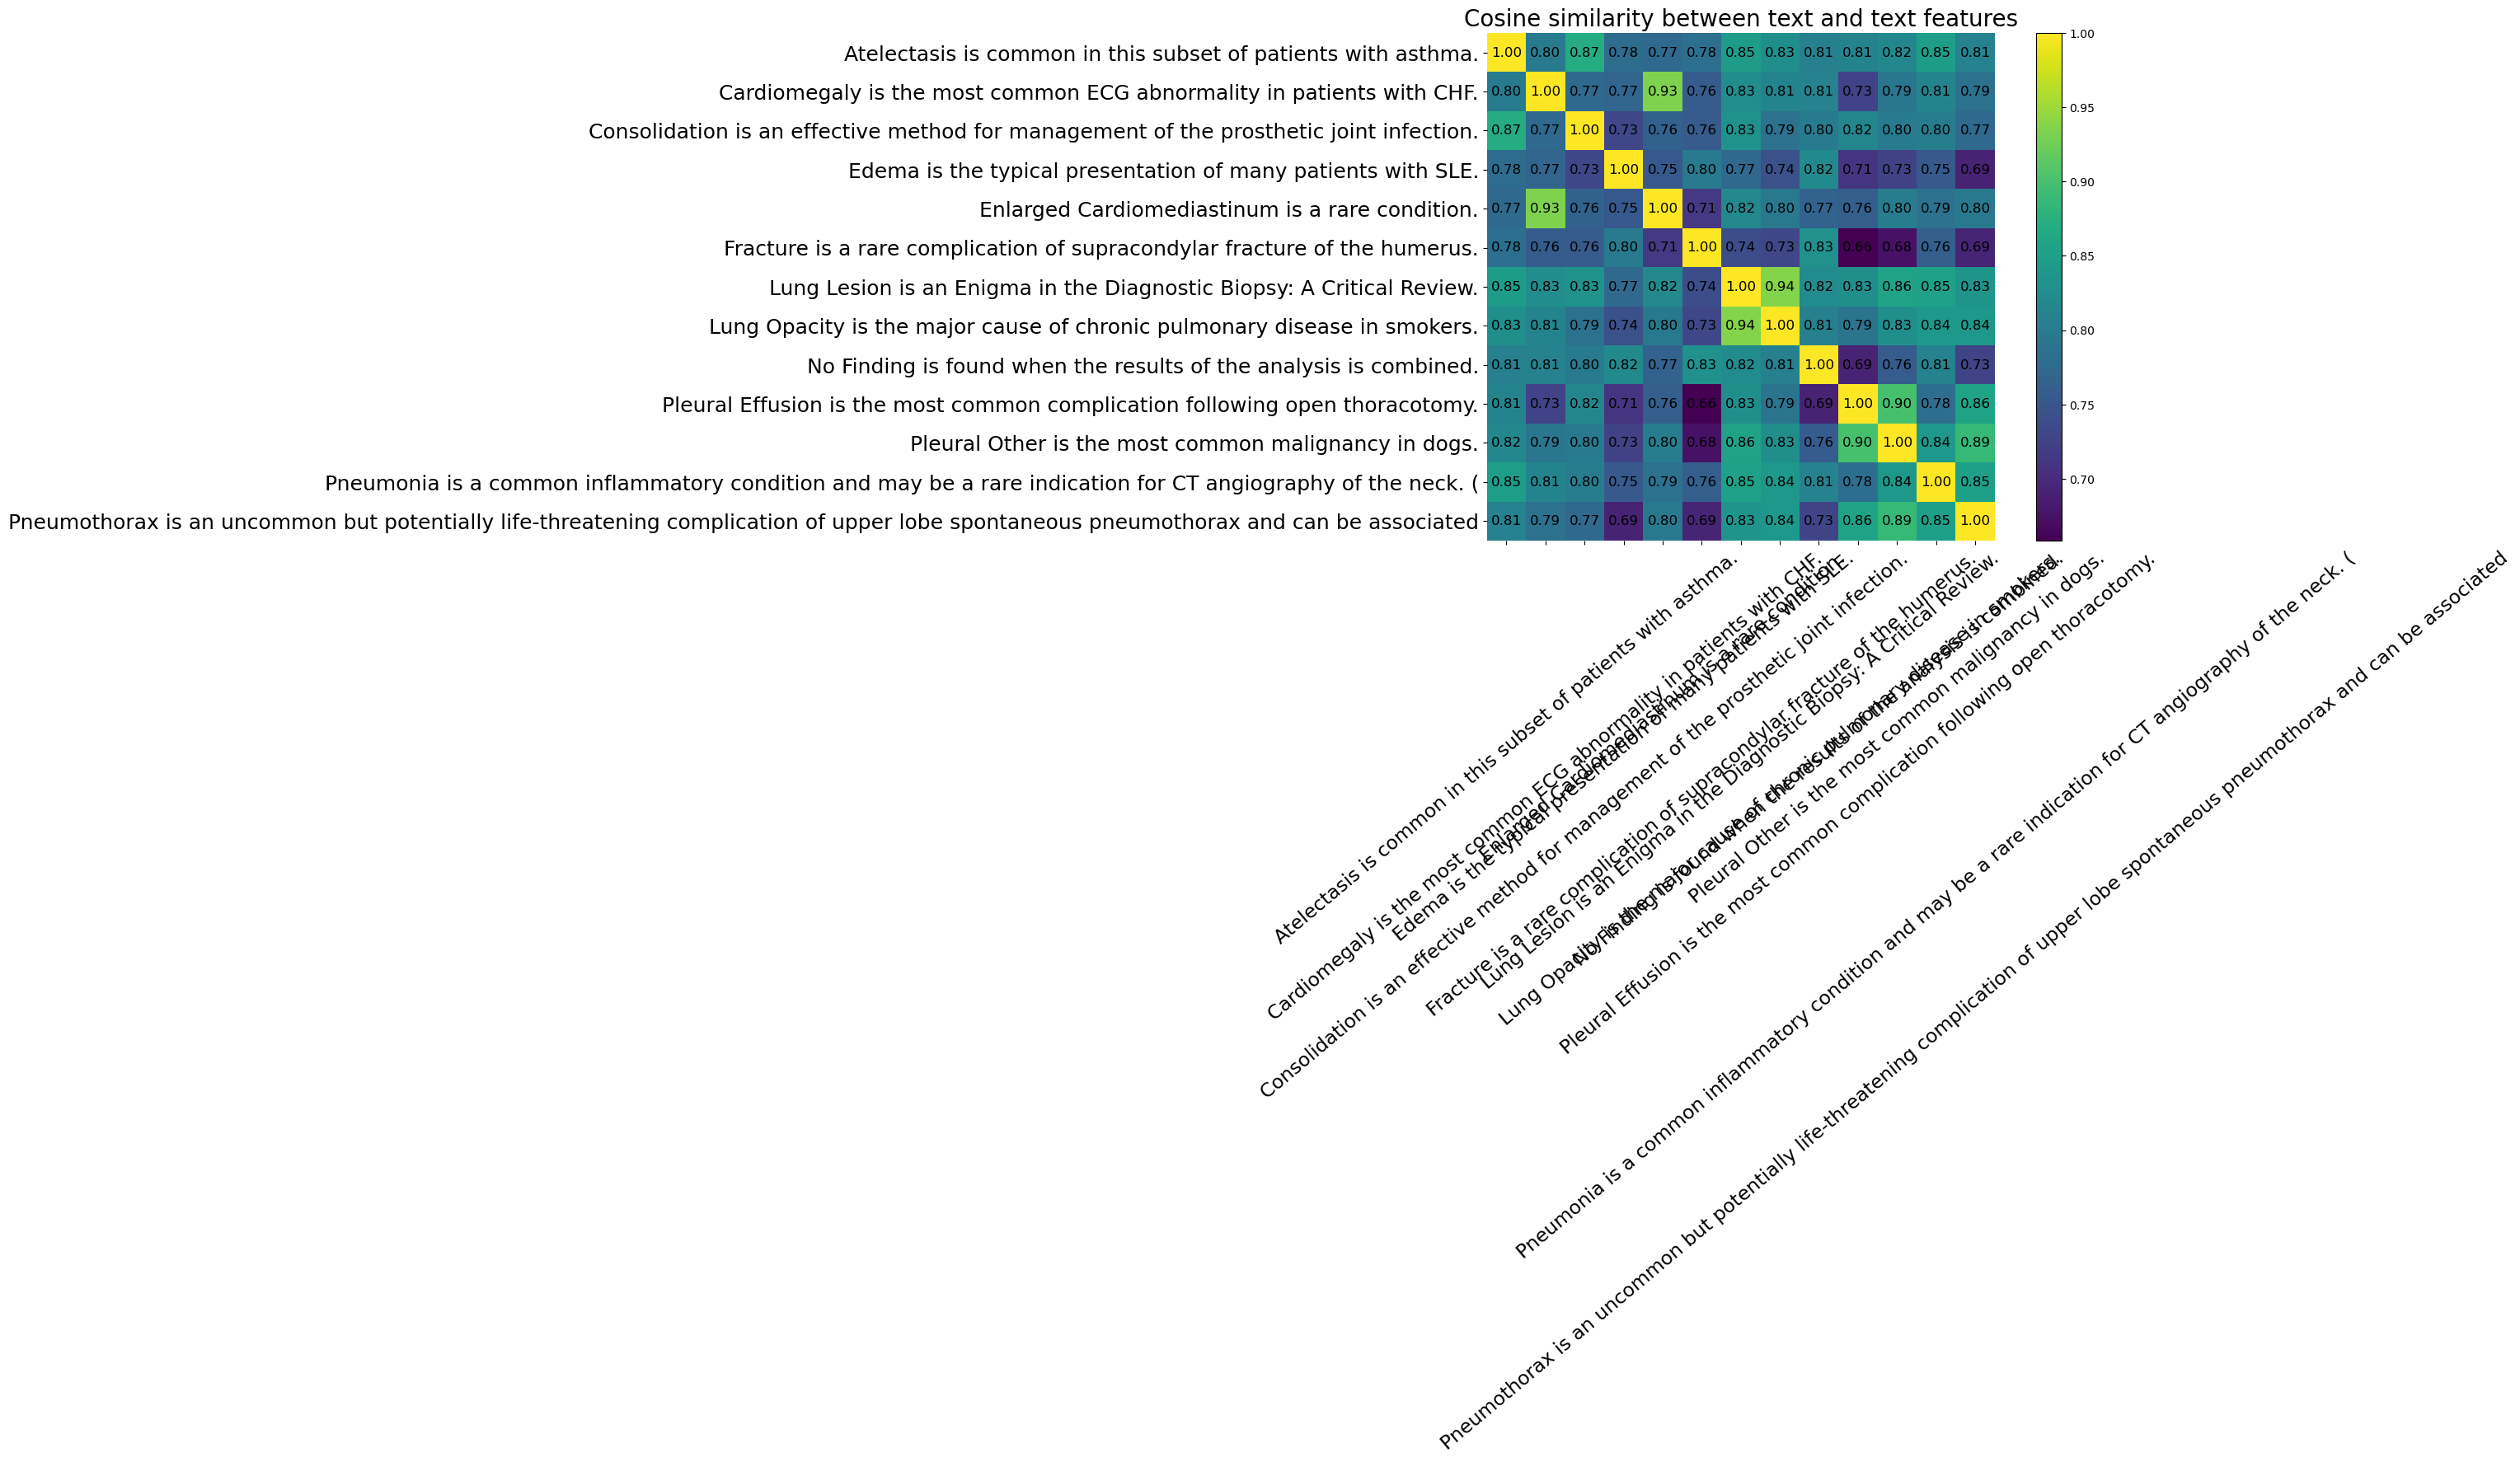

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 8))
plt.imshow(similarity)
plt.colorbar()
plt.yticks(range(13), text, fontsize=18)
plt.xticks(range(13), text, fontsize=17, rotation=40)
# for i, image in enumerate(text):
#     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

# plt.xlim([-0.5, 4 - 0.5])
# plt.ylim([4 + 0.5, -2])

plt.title("Cosine similarity between text and text features", size=20)
similarity

## Compare different VLM
- CLIP
- BiomedCLIP
- [BiomedVLP-CXR-BERT-specialized](https://huggingface.co/microsoft/BiomedVLP-CXR-BERT-specialized/tree/main)

In [5]:
chest_xray_diseases = [
    'Pneumonia',
    'Tuberculosis (TB)',
    'Lung Cancer',
    'Pleural Effusion',
    'Pneumothorax',
    'Atelectasis',
    'Bronchitis',
    'COPD (Chronic Obstructive ··Pulmonary Disease)',
    'Interstitial Lung Disease',
    'Pulmonary Edema',
    'Pulmonary Fibrosis',
    'Lung Abscess',
    'Cystic Fibrosis',
    'Pulmonary Hypertension',
    'Sarcoidosis',
    'Asbestosis',
    'Silicosis',
    'Pulmonary Embolism',
    'Aortic Aneurysm',
    'Cardiomegaly',
    'Congestive Heart Failure',
    'Costochondritis'
]

brain_mri_diseases = [
    'Brain Tumor',
    'Multiple Sclerosis',
    'Stroke',
    'Traumatic Brain Injury',
    "Alzheimer's Disease",
    "Parkinson's Disease",
    'Epilepsy',
    'Meningitis',
    'Encephalitis',
    'Hydrocephalus',
    'Cerebral Aneurysm',
    'Arteriovenous Malformation (AVM)',
    'Pituitary Tumor',
    'Cerebral Palsy',
    "Huntington's Disease",
    'Chiari Malformation',
    'Demyelinating Diseases',
    'Brain Abscess',
    'Cerebral Infarction',
    'Cerebral Hemorrhage',
    'Migraine',
    'Visual Pathway Disorders',
    'Cranial Nerve Disorders'
]

teeth_xray_conditions = [
    'Tooth Decay (Cavities)',
    'Gum Disease (Periodontitis)',
    'Impacted Teeth',
    'Tooth Abscess',
    'Dental Cysts',
    'Tooth Fractures',
    'Malocclusion (Misalignment of Teeth)',
    'Jaw Tumors',
    'Temporomandibular Joint (TMJ) Disorders',
    'Orthodontic Issues',
    'Oral Cancers',
    'Dental Plaque and Calculus',
    'Root Canal Infections',
    'Dental Erosion',
    'Wisdom Teeth Issues',
    'Gingivitis',
    'Dental Crowding',
    'Bruxism (Teeth Grinding)',
    'Dental Trauma',
    'Salivary Gland Stones',
    'Dental Abscess',
    'Periapical Lesions',
    'Dental Pulp Calcification'
]

leg_conditions = [
    'Peripheral Artery Disease (PAD)',
    'Deep Vein Thrombosis (DVT)',
    'Varicose Veins',
    'Cellulitis',
    'Osteoarthritis of the Knee',
    'Rheumatoid Arthritis',
    'Gout',
    'Osteoporosis',
    'Tendinitis',
    'Shin Splints',
    'Sprains and Strains',
    'Stress Fractures',
    'Compartment Syndrome',
    'Plantar Fasciitis',
    'Achilles Tendinitis',
    'Peripheral Neuropathy',
    'Restless Legs Syndrome (RLS)',
    'Muscle Cramps',
    'Venous Ulcers',
    'Bursitis',
    'Peripheral Nerve Disorders',
    'Lymphedema',
    'Legg-Calve-Perthes Disease',
    'Femoral Acetabular Impingement',
    'Popliteal Cyst (Baker’s Cyst)',
    'Tibial Stress Syndrome (TSS)',
    'Charcot-Marie-Tooth Disease',
    'Complicated Fractures',
    'Complications from Diabetes (e.g., Diabetic Neuropathy)',
]


disease_zoo = {"leg": leg_conditions, "teeth": teeth_xray_conditions, 'chest': chest_xray_diseases, "brain": brain_mri_diseases}


### Compare intra/inter-class
1. the similarity of within each disease
2. the similarity among different disease cone effect

### BiomedCLIP

['Peripheral Artery Disease (PAD)', 'Deep Vein Thrombosis (DVT)', 'Varicose Veins', 'Cellulitis', 'Osteoarthritis of the Knee', 'Rheumatoid Arthritis', 'Gout', 'Osteoporosis', 'Tendinitis', 'Shin Splints', 'Sprains and Strains', 'Stress Fractures', 'Compartment Syndrome', 'Plantar Fasciitis', 'Achilles Tendinitis', 'Peripheral Neuropathy', 'Restless Legs Syndrome (RLS)', 'Muscle Cramps', 'Venous Ulcers', 'Bursitis', 'Peripheral Nerve Disorders', 'Lymphedema', 'Legg-Calve-Perthes Disease', 'Femoral Acetabular Impingement', 'Popliteal Cyst (Baker’s Cyst)', 'Tibial Stress Syndrome (TSS)', 'Charcot-Marie-Tooth Disease', 'Complicated Fractures', 'Complications from Diabetes (e.g., Diabetic Neuropathy)']
torch.Size([29, 29])
leg
['Tooth Decay (Cavities)', 'Gum Disease (Periodontitis)', 'Impacted Teeth', 'Tooth Abscess', 'Dental Cysts', 'Tooth Fractures', 'Malocclusion (Misalignment of Teeth)', 'Jaw Tumors', 'Temporomandibular Joint (TMJ) Disorders', 'Orthodontic Issues', 'Oral Cancers', 'Den

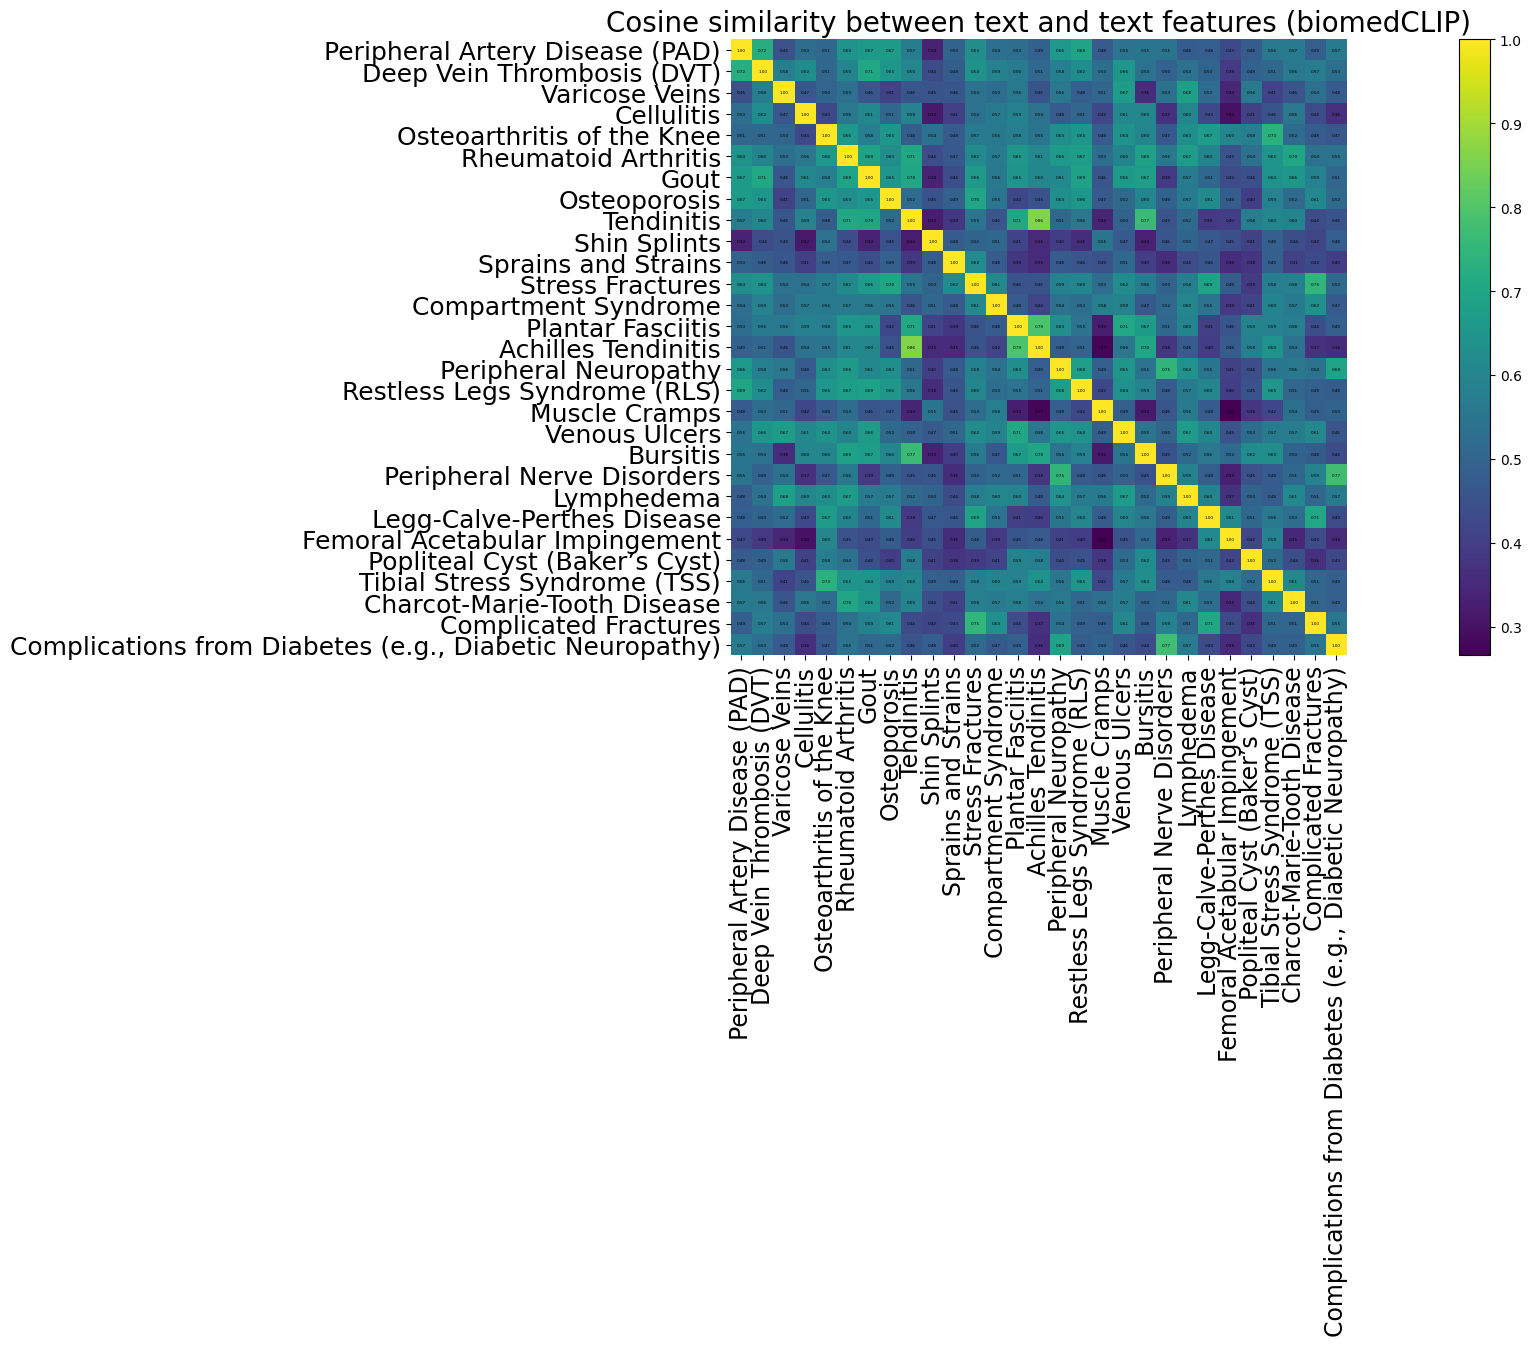

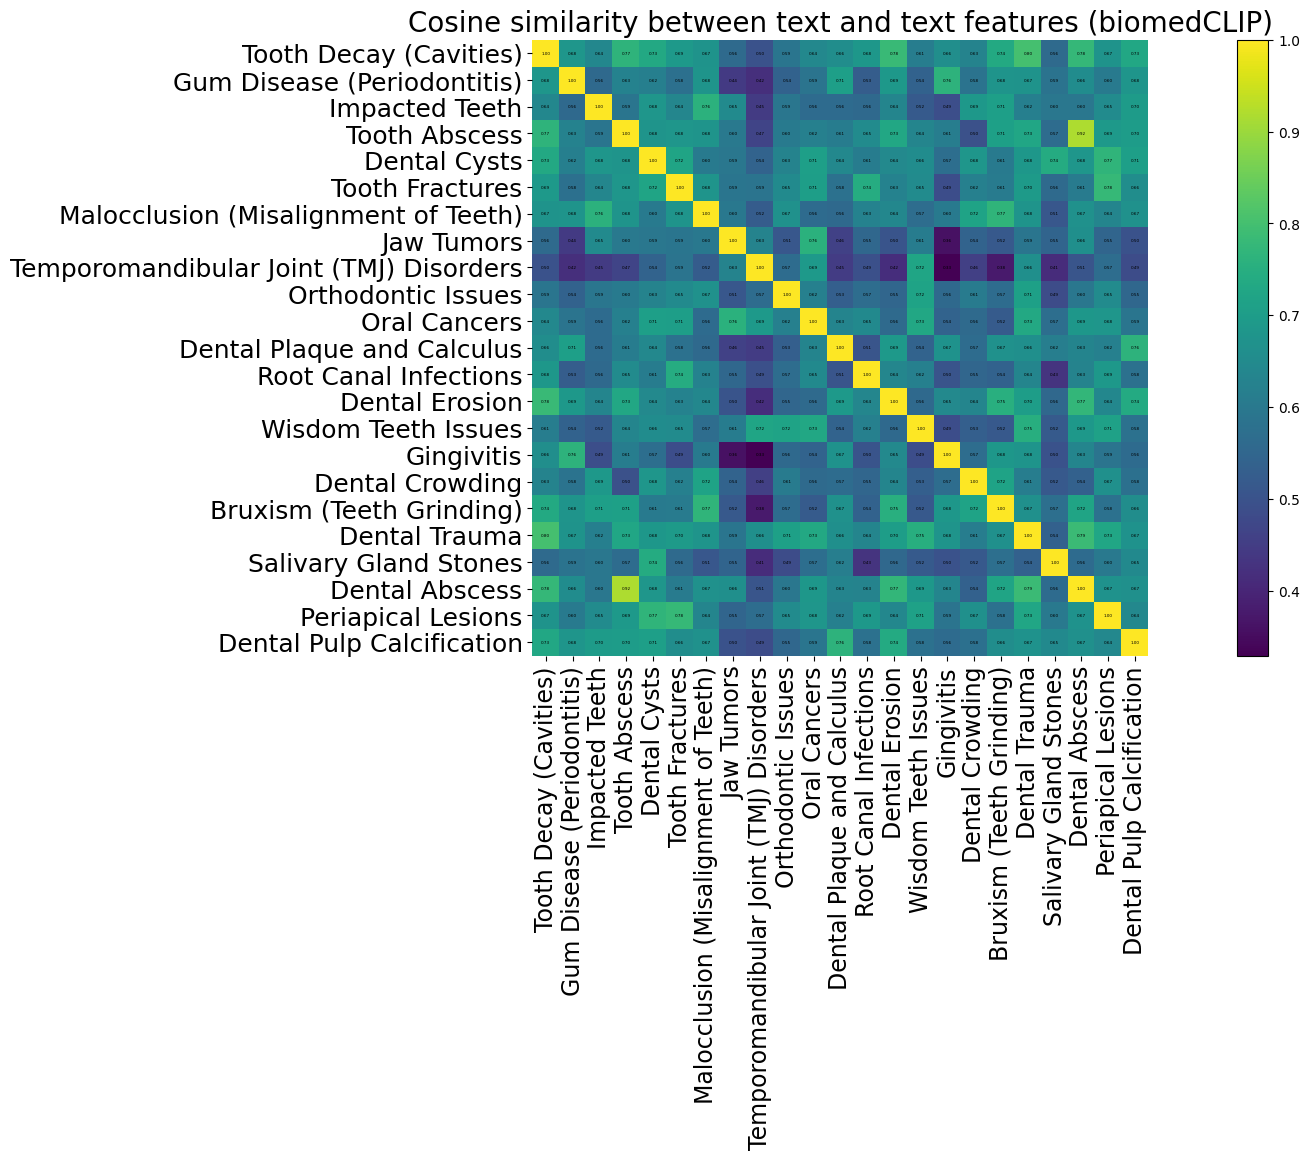

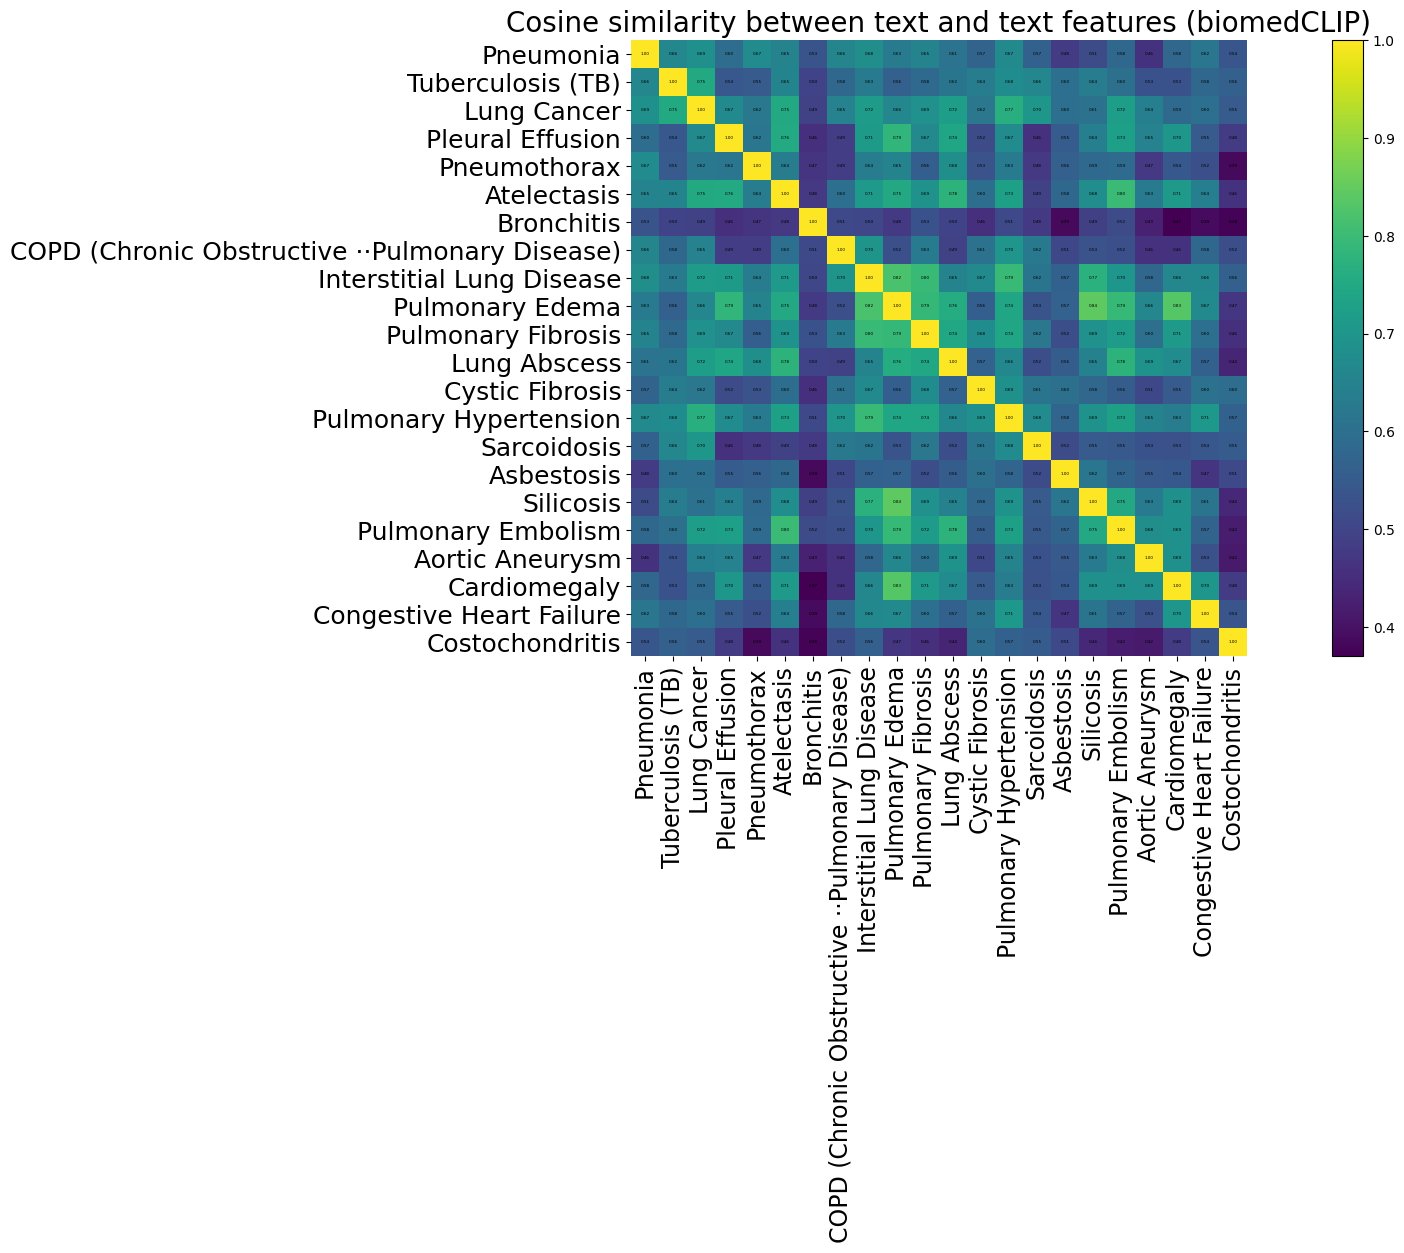

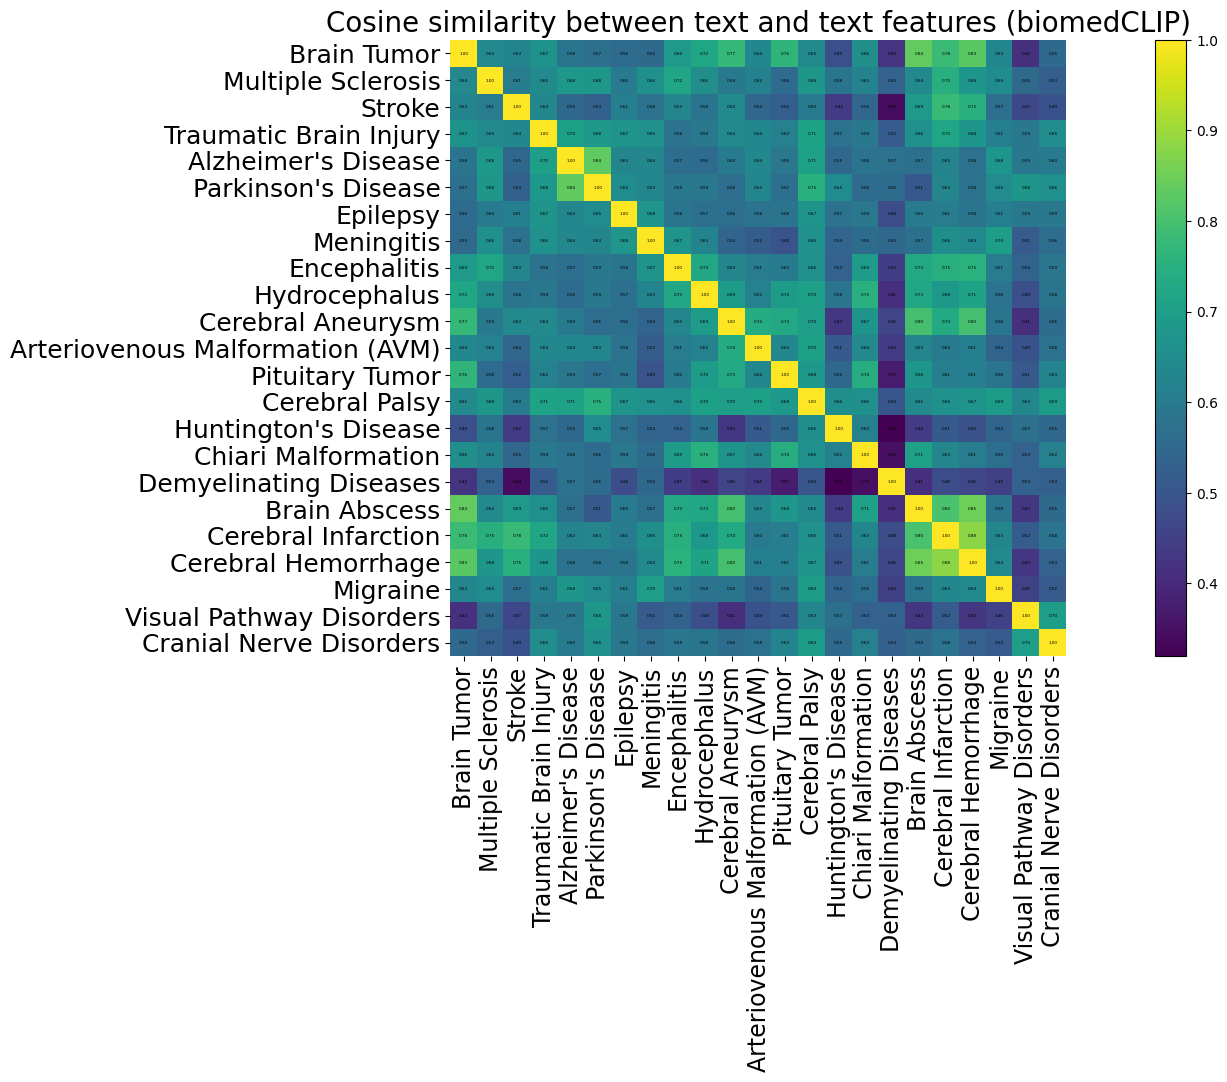

In [13]:

import torch
from PIL import Image

def biomedClip(text):
  import open_clip

  model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
  tokenizer = open_clip.get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
  device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')
  model.to(device)
  model.eval()

  context_length = 256
  print(text)
  texts = tokenizer(text, context_length=context_length).to(device)
  images = torch.stack([preprocess_val(Image.open("/Users/liu/Desktop/school_academy/ShanghaiTech/learning/code/diagnosisP/x_ray_constrastive/data/mimic-cxr-train/images/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg"))]).to(device)
  with torch.no_grad():
      image_features, text_features, logit_scale = model(images, texts)
  similarity_matrix = torch.mm(text_features, text_features.t())
  text_features /= text_features.norm(dim=-1, keepdim=True)
  similarity = (1 * text_features @ text_features.T)
  print(similarity.shape)
  similarity=similarity.cpu().numpy()
  data = similarity_matrix.cpu().numpy()
  return similarity, text_features


def plot(n:int, similarity):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(n, 8))
  plt.imshow(similarity)
  plt.colorbar()
  plt.yticks(range(n), text, fontsize=18)
  plt.xticks(range(n), text, fontsize=17, rotation=90)
  # for i, image in enumerate(text):
  #     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
  for x in range(similarity.shape[1]):
      for y in range(similarity.shape[0]):
          plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=3)

  for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

  # plt.xlim([-0.5, 4 - 0.5])
  # plt.ylim([4 + 0.5, -2])

  plt.title("Cosine similarity between text and text features (biomedCLIP)", size=20)


dis_embedding_dict = {}
for i in disease_zoo:
   text = disease_zoo[i]
   sim, text_features = biomedClip(text)
   print(i)
   plot(len(text), sim)
   dis_embedding_dict[i] = text_features

### CLIP

torch.Size([29, 29])
leg
torch.Size([23, 23])
teeth
torch.Size([22, 22])
chest
torch.Size([23, 23])
brain


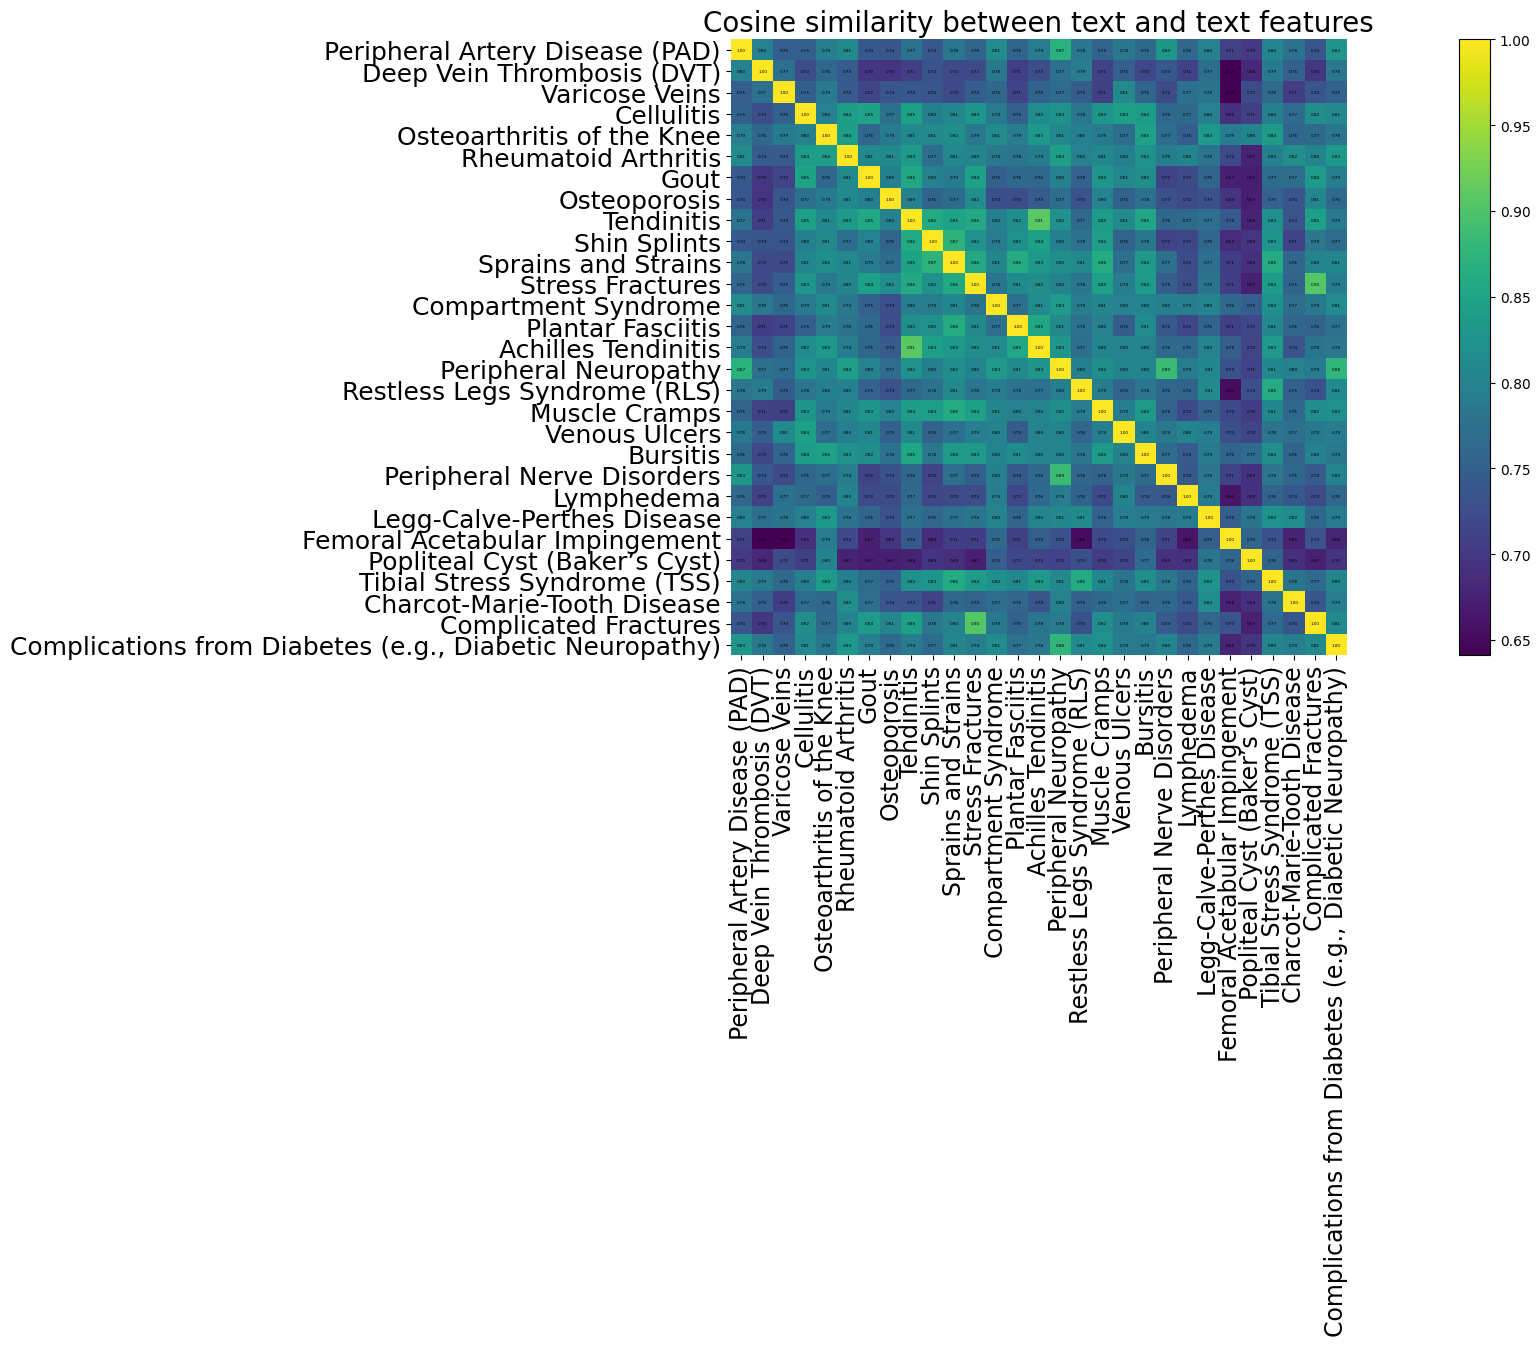

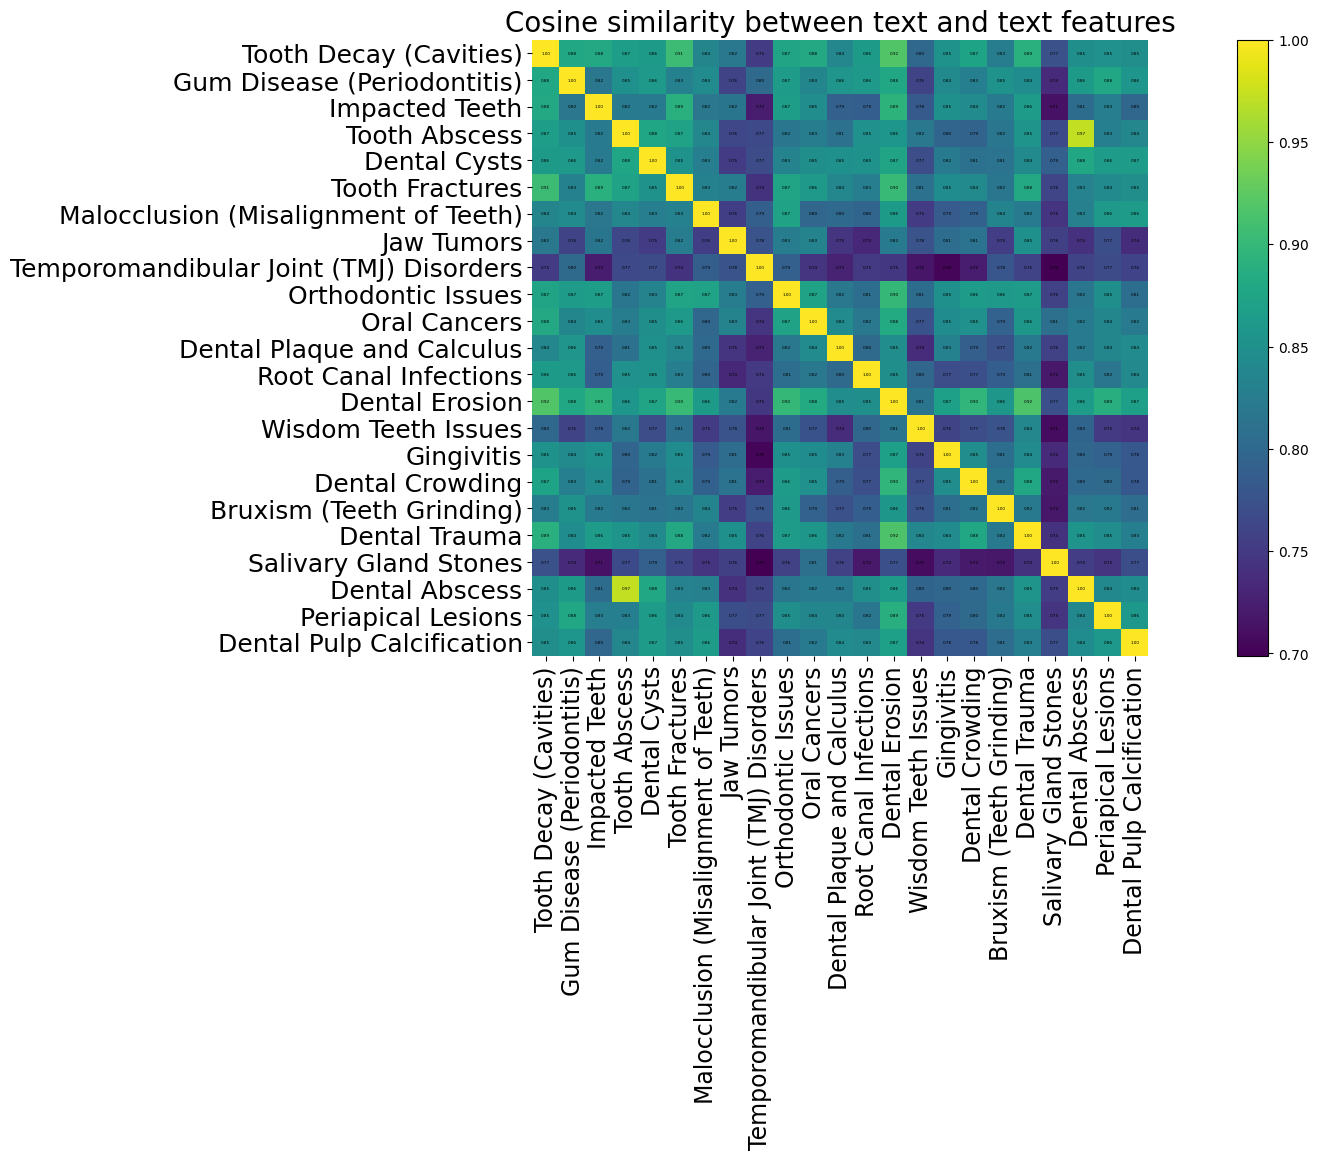

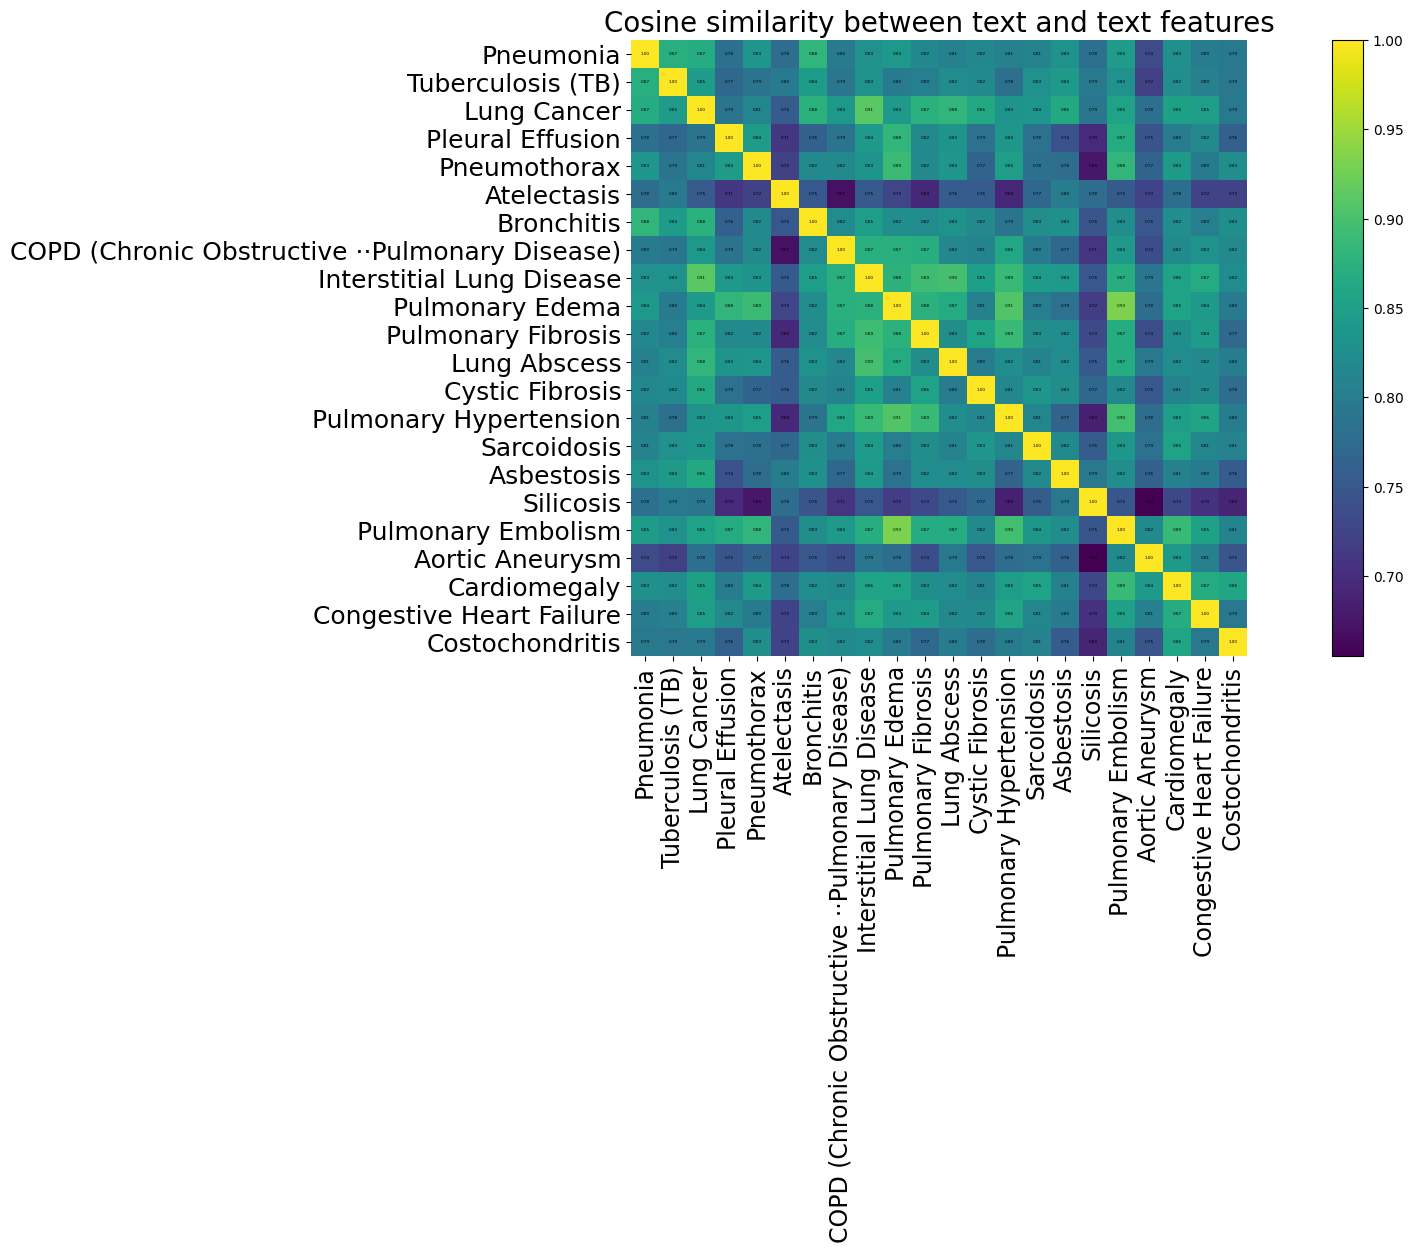

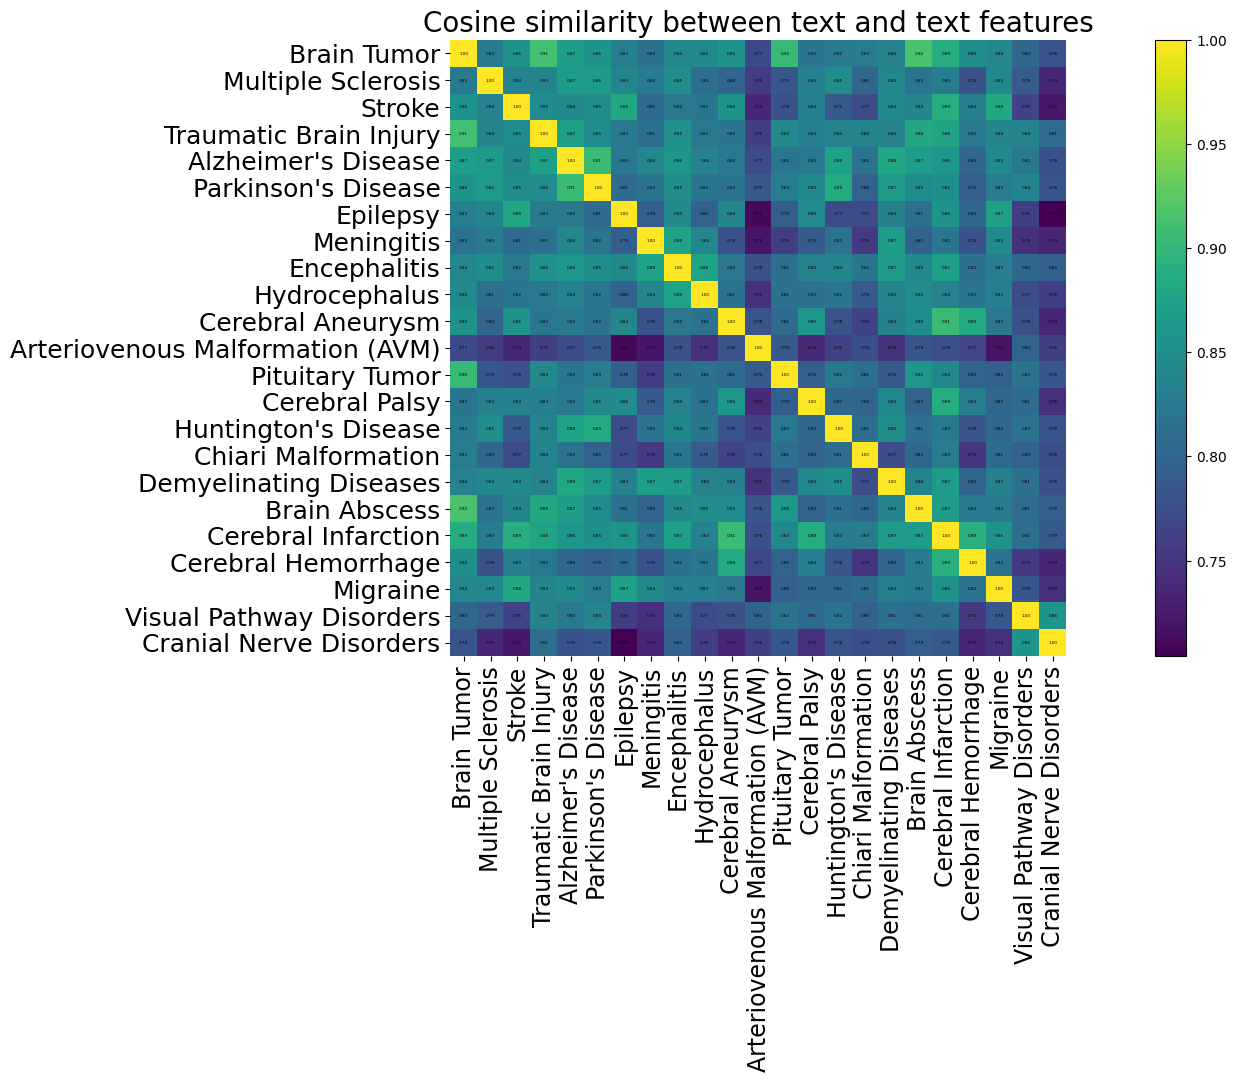

In [4]:
# CLIP
import clip
import torch
def encode_get_similarity(text):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model, preprocess = clip.load("ViT-B/32", device=device)

  text_inputs = torch.cat([clip.tokenize(f"{c}") for c in text]).to(device)
  with torch.no_grad():
    text_features = model.encode_text(text_inputs)
  similarity_matrix = torch.mm(text_features, text_features.t())
  text_features /= text_features.norm(dim=-1, keepdim=True)
  similarity = (1 * text_features @ text_features.T)
  print(similarity.shape)
  similarity=similarity.cpu().numpy()
  data = similarity_matrix.cpu().numpy()
  return similarity, text_features

# Calculate features
# print(text_inputs.shape)
# with torch.no_grad():
#     text_features = model.encode_text(text_inputs)

def plot(n:int, similarity):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(n, 8))
  plt.imshow(similarity)
  plt.colorbar()
  plt.yticks(range(n), text, fontsize=18)
  plt.xticks(range(n), text, fontsize=17, rotation=90)
  # for i, image in enumerate(text):
  #     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
  for x in range(similarity.shape[1]):
      for y in range(similarity.shape[0]):
          plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=3)

  for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

  # plt.xlim([-0.5, 4 - 0.5])
  # plt.ylim([4 + 0.5, -2])

  plt.title("Cosine similarity between text and text features", size=20)


dis_embedding_dict = {}
for i in disease_zoo:
   text = disease_zoo[i]
   sim, text_features = encode_get_similarity(text)
   print(i)
   plot(len(text), sim)
   dis_embedding_dict[i] = text_features

   
  

### BiomedVLP-CXR-BERT-specialized

In [6]:
import torch
from transformers import AutoModel, AutoTokenizer
def CXR_BERT(text):
  url = "microsoft/BiomedVLP-CXR-BERT-specialized"
  tokenizer = AutoTokenizer.from_pretrained(url, trust_remote_code=True)
  model = AutoModel.from_pretrained(url, trust_remote_code=True)
  device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')
  # model.to(device)
  model.eval()
  text_prompts = text
  tokenizer_output = tokenizer.batch_encode_plus(batch_text_or_text_pairs=text_prompts,
                                                add_special_tokens=True,
                                                padding='longest',
                                                return_tensors='pt')
  # print((tokenizer_output.attention_mask.shape))
  # print((tokenizer_output.input_ids.shape))
  embeddings = model.get_projected_text_embeddings(input_ids=tokenizer_output.input_ids,
                                                  attention_mask=tokenizer_output.attention_mask)

  # # Compute the cosine similarity of sentence embeddings obtained from input text prompts.
  sim = torch.mm(embeddings, embeddings.t())
  similarity_matrix = sim
  text_features = embeddings
  text_features /= text_features.norm(dim=-1, keepdim=True)
  similarity = (1 * text_features @ text_features.T)
  print(similarity.shape)
  similarity=similarity.detach().numpy() 
  data = similarity_matrix.detach().numpy() 
  return similarity, embeddings

def plot(n:int, similarity):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(n, 8))
  plt.imshow(similarity)
  plt.colorbar()
  plt.yticks(range(n), text, fontsize=18)
  plt.xticks(range(n), text, fontsize=17, rotation=90)
  # for i, image in enumerate(text):
  #     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
  for x in range(similarity.shape[1]):
      for y in range(similarity.shape[0]):
          plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=3)

  for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

  # plt.xlim([-0.5, 4 - 0.5])
  # plt.ylim([4 + 0.5, -2])

  plt.title("Cosine similarity between text and text features (CXR_BERT)", size=20)
  plt.show()



chest_xray_diseases = [
    'Pneumonia',
    'Tuberculosis (TB)',
    'Lung Cancer',
    'Pleural Effusion',
    'Pneumothorax',
    'Atelectasis',
    'Bronchitis',
    'COPD (Chronic Obstructive ··Pulmonary Disease)',
    'Interstitial Lung Disease',
    'Pulmonary Edema',
    'Pulmonary Fibrosis',
    'Lung Abscess',
    'Cystic Fibrosis',
    'Pulmonary Hypertension',
    'Sarcoidosis',
    'Asbestosis',
    'Silicosis',
    'Pulmonary Embolism',
    'Aortic Aneurysm',
    'Cardiomegaly',
    'Congestive Heart Failure',
    'Costochondritis'
]

brain_mri_diseases = [
    'Brain Tumor',
    'Multiple Sclerosis',
    'Stroke',
    'Traumatic Brain Injury',
    "Alzheimer's Disease",
    "Parkinson's Disease",
    'Epilepsy',
    'Meningitis',
    'Encephalitis',
    'Hydrocephalus',
    'Cerebral Aneurysm',
    'Arteriovenous Malformation (AVM)',
    'Pituitary Tumor',
    'Cerebral Palsy',
    "Huntington's Disease",
    'Chiari Malformation',
    'Demyelinating Diseases',
    'Brain Abscess',
    'Cerebral Infarction',
    'Cerebral Hemorrhage',
    'Migraine',
    'Visual Pathway Disorders',
    'Cranial Nerve Disorders'
]

teeth_xray_conditions = [
    'Tooth Decay (Cavities)',
    'Gum Disease (Periodontitis)',
    'Impacted Teeth',
    'Tooth Abscess',
    'Dental Cysts',
    'Tooth Fractures',
    'Malocclusion (Misalignment of Teeth)',
    'Jaw Tumors',
    'Temporomandibular Joint (TMJ) Disorders',
    'Orthodontic Issues',
    'Oral Cancers',
    'Dental Plaque and Calculus',
    'Root Canal Infections',
    'Dental Erosion',
    'Wisdom Teeth Issues',
    'Gingivitis',
    'Dental Crowding',
    'Bruxism (Teeth Grinding)',
    'Dental Trauma',
    'Salivary Gland Stones',
    'Dental Abscess',
    'Periapical Lesions',
    'Dental Pulp Calcification'
]

leg_conditions = [
    'Peripheral Artery Disease (PAD)',
    'Deep Vein Thrombosis (DVT)',
    'Varicose Veins',
    'Cellulitis',
    'Osteoarthritis of the Knee',
    'Rheumatoid Arthritis',
    'Gout',
    'Osteoporosis',
    'Tendinitis',
    'Shin Splints',
    'Sprains and Strains',
    'Stress Fractures',
    'Compartment Syndrome',
    'Plantar Fasciitis',
    'Achilles Tendinitis',
    'Peripheral Neuropathy',
    'Restless Legs Syndrome (RLS)',
    'Muscle Cramps',
    'Venous Ulcers',
    'Bursitis',
    'Peripheral Nerve Disorders',
    'Lymphedema',
    'Legg-Calve-Perthes Disease',
    'Femoral Acetabular Impingement',
    'Popliteal Cyst (Baker’s Cyst)',
    'Tibial Stress Syndrome (TSS)',
    'Charcot-Marie-Tooth Disease',
    'Complicated Fractures',
    'Complications from Diabetes (e.g., Diabetic Neuropathy)',
]


disease_zoo = {"leg": leg_conditions, "teeth": teeth_xray_conditions, 'chest': chest_xray_diseases, "brain": brain_mri_diseases}

dis_embedding_dict = {}
for i in disease_zoo:
   text = disease_zoo[i]
   sim, text_features = CXR_BERT(text)
   print(i)
   plot(len(text), sim)
   dis_embedding_dict[i] = text_features

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 3f09a5c7-eefd-4155-800a-d4586ebf2b34)')' thrown while requesting HEAD https://huggingface.co/microsoft/BiomedVLP-CXR-BERT-specialized/resolve/main/config.json


TypeError: transformers_modules.microsoft.BiomedVLP-CXR-BERT-specialized.b59c09e51ab2410b24f4be214bbb49043fe63fc2.modeling_cxrbert.CXRBertOutput is not a dataclasss. This is a subclass of ModelOutput and so must use the @dataclass decorator.

### CXR-BERT-general

/Users/liu/anaconda3/envs/torch_nightly_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 35b69662-c457-4126-8c86-37702931120b)')' thrown while requesting HEAD https://huggingface.co/microsoft/BiomedVLP-CXR-BERT-general/resolve/main/config.json


torch.Size([29, 29])
leg


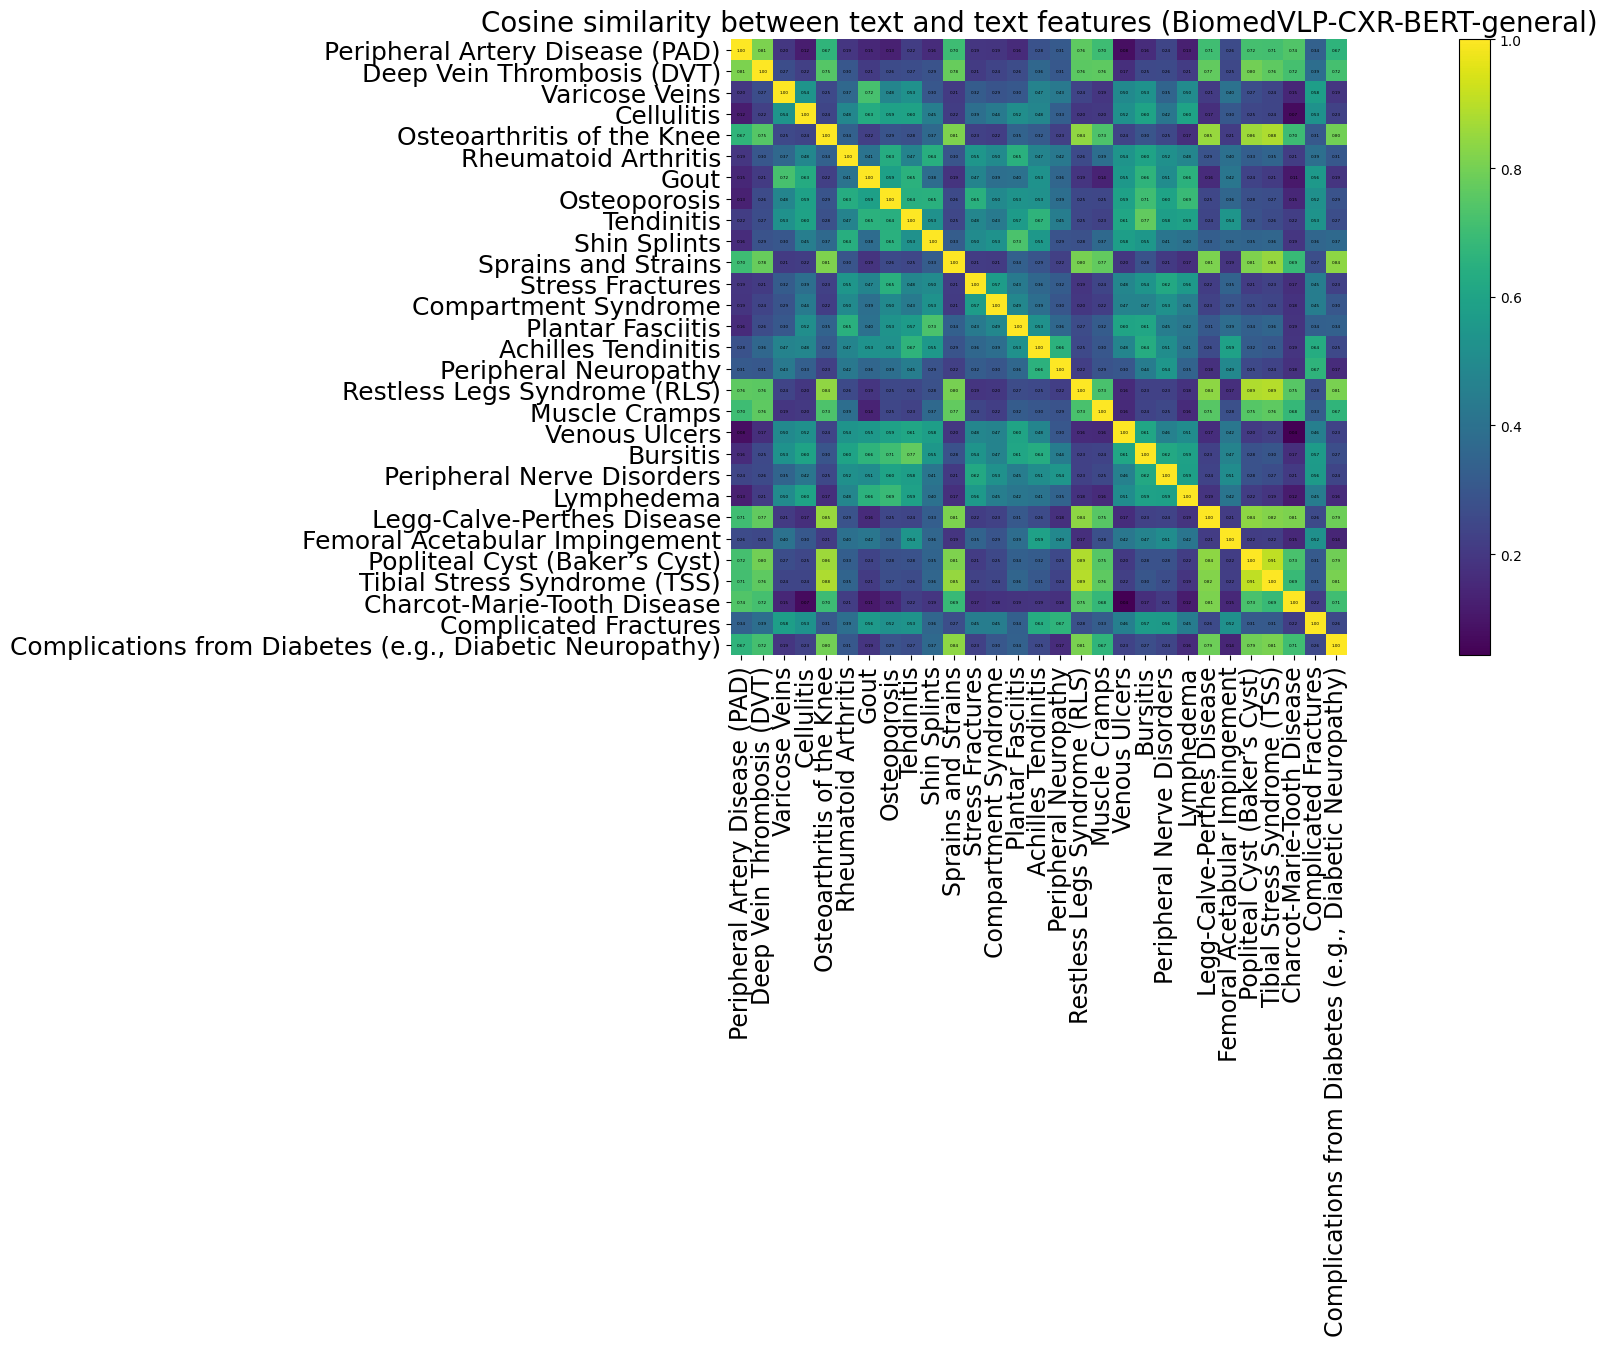

torch.Size([23, 23])
teeth


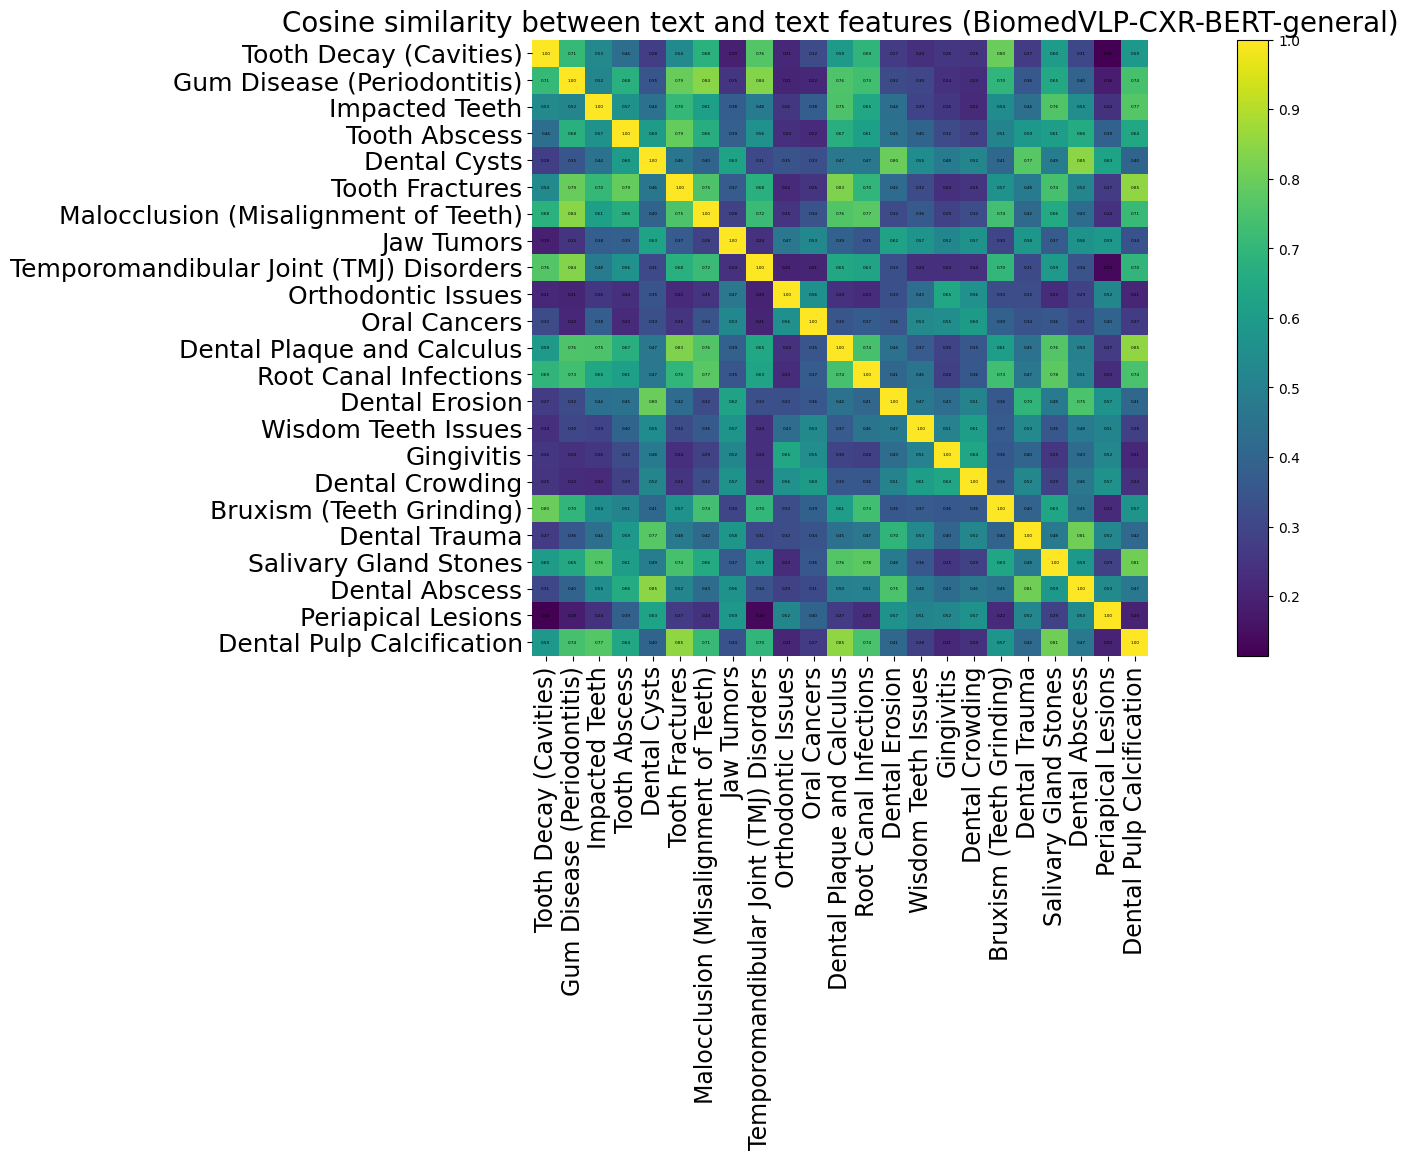

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 5290548f-acab-41ed-b1fb-4403fbde1d9a)')' thrown while requesting HEAD https://huggingface.co/microsoft/BiomedVLP-CXR-BERT-general/resolve/main/config.json


torch.Size([22, 22])
chest


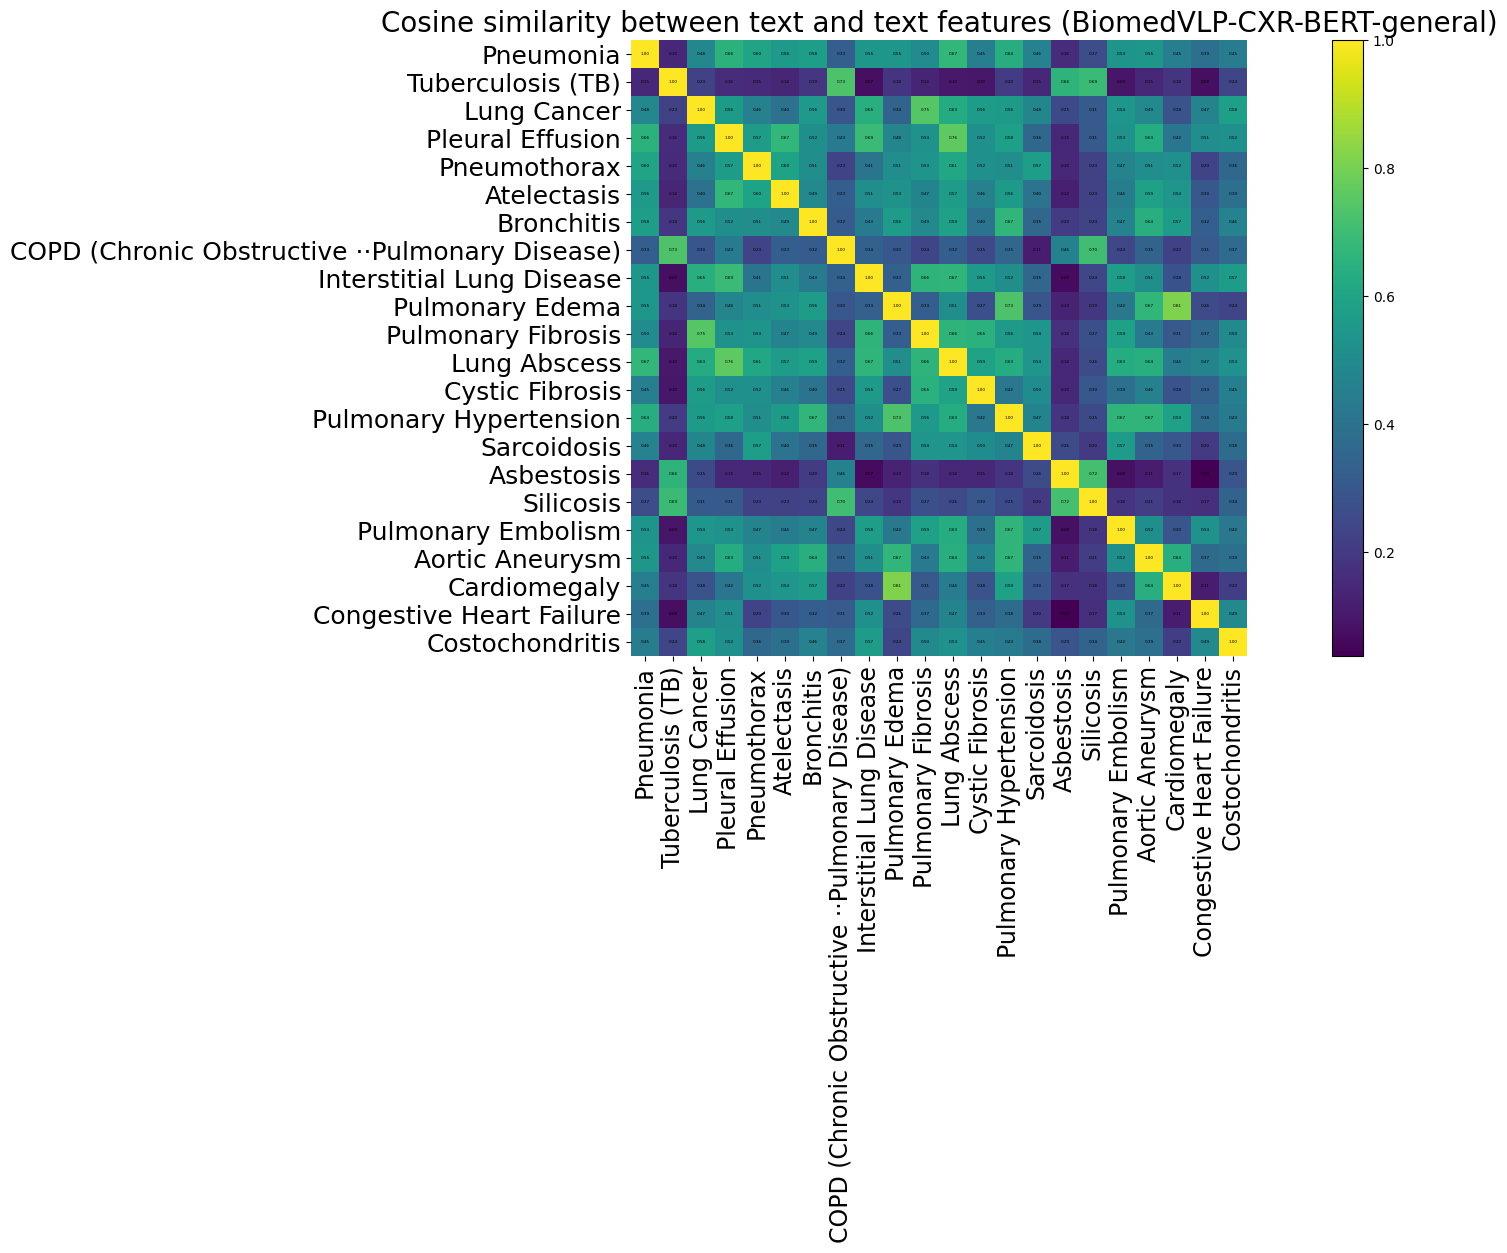

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 64e5628a-e2b6-46e3-b2e2-4d9236900dac)')' thrown while requesting HEAD https://huggingface.co/microsoft/BiomedVLP-CXR-BERT-general/resolve/main/config.json


torch.Size([23, 23])
brain


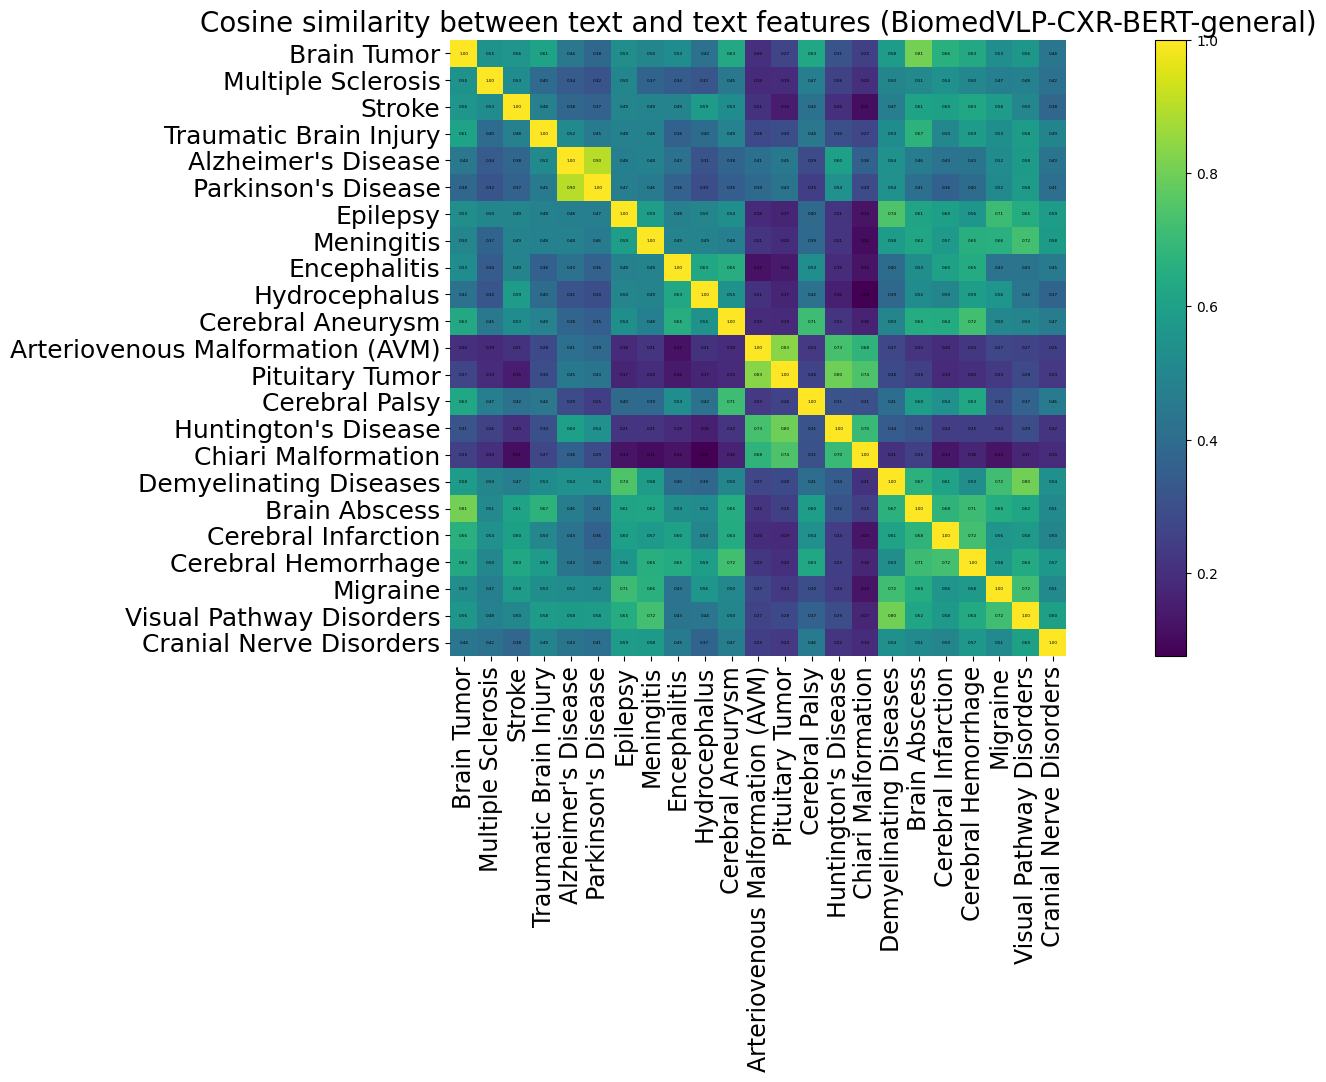

In [1]:

import torch
from transformers import AutoModel, AutoTokenizer
def CXR_BERT(text):
  tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedVLP-CXR-BERT-general")
  model = AutoModel.from_pretrained("microsoft/BiomedVLP-CXR-BERT-general")
  device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')
  # model.to(device)
  model.eval()
  text_prompts = text
  tokenizer_output = tokenizer.batch_encode_plus(batch_text_or_text_pairs=text_prompts,
                                                add_special_tokens=True,
                                                padding='longest',
                                                return_tensors='pt')
  # print((tokenizer_output.attention_mask.shape))
  # print((tokenizer_output.input_ids.shape))
  embeddings = model(input_ids=tokenizer_output.input_ids,
                                                  attention_mask=tokenizer_output.attention_mask)
  embeddings = embeddings.pooler_output
  # print(type(embeddings))

  # # Compute the cosine similarity of sentence embeddings obtained from input text prompts.
  sim = torch.mm(embeddings, embeddings.t())
  similarity_matrix = sim
  text_features = embeddings
  text_features /= text_features.norm(dim=-1, keepdim=True)
  similarity = (1 * text_features @ text_features.T)
  print(similarity.shape)
  similarity=similarity.detach().numpy() 
  data = similarity_matrix.detach().numpy() 
  return similarity, embeddings

def plot(n:int, similarity):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(n, 8))
  plt.imshow(similarity)
  plt.colorbar()
  plt.yticks(range(n), text, fontsize=18)
  plt.xticks(range(n), text, fontsize=17, rotation=90)
  # for i, image in enumerate(text):
  #     plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
  for x in range(similarity.shape[1]):
      for y in range(similarity.shape[0]):
          plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=3)

  for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

  # plt.xlim([-0.5, 4 - 0.5])
  # plt.ylim([4 + 0.5, -2])

  plt.title("Cosine similarity between text and text features (BiomedVLP-CXR-BERT-general)", size=20)
  plt.show()



chest_xray_diseases = [
    'Pneumonia',
    'Tuberculosis (TB)',
    'Lung Cancer',
    'Pleural Effusion',
    'Pneumothorax',
    'Atelectasis',
    'Bronchitis',
    'COPD (Chronic Obstructive ··Pulmonary Disease)',
    'Interstitial Lung Disease',
    'Pulmonary Edema',
    'Pulmonary Fibrosis',
    'Lung Abscess',
    'Cystic Fibrosis',
    'Pulmonary Hypertension',
    'Sarcoidosis',
    'Asbestosis',
    'Silicosis',
    'Pulmonary Embolism',
    'Aortic Aneurysm',
    'Cardiomegaly',
    'Congestive Heart Failure',
    'Costochondritis'
]

brain_mri_diseases = [
    'Brain Tumor',
    'Multiple Sclerosis',
    'Stroke',
    'Traumatic Brain Injury',
    "Alzheimer's Disease",
    "Parkinson's Disease",
    'Epilepsy',
    'Meningitis',
    'Encephalitis',
    'Hydrocephalus',
    'Cerebral Aneurysm',
    'Arteriovenous Malformation (AVM)',
    'Pituitary Tumor',
    'Cerebral Palsy',
    "Huntington's Disease",
    'Chiari Malformation',
    'Demyelinating Diseases',
    'Brain Abscess',
    'Cerebral Infarction',
    'Cerebral Hemorrhage',
    'Migraine',
    'Visual Pathway Disorders',
    'Cranial Nerve Disorders'
]

teeth_xray_conditions = [
    'Tooth Decay (Cavities)',
    'Gum Disease (Periodontitis)',
    'Impacted Teeth',
    'Tooth Abscess',
    'Dental Cysts',
    'Tooth Fractures',
    'Malocclusion (Misalignment of Teeth)',
    'Jaw Tumors',
    'Temporomandibular Joint (TMJ) Disorders',
    'Orthodontic Issues',
    'Oral Cancers',
    'Dental Plaque and Calculus',
    'Root Canal Infections',
    'Dental Erosion',
    'Wisdom Teeth Issues',
    'Gingivitis',
    'Dental Crowding',
    'Bruxism (Teeth Grinding)',
    'Dental Trauma',
    'Salivary Gland Stones',
    'Dental Abscess',
    'Periapical Lesions',
    'Dental Pulp Calcification'
]

leg_conditions = [
    'Peripheral Artery Disease (PAD)',
    'Deep Vein Thrombosis (DVT)',
    'Varicose Veins',
    'Cellulitis',
    'Osteoarthritis of the Knee',
    'Rheumatoid Arthritis',
    'Gout',
    'Osteoporosis',
    'Tendinitis',
    'Shin Splints',
    'Sprains and Strains',
    'Stress Fractures',
    'Compartment Syndrome',
    'Plantar Fasciitis',
    'Achilles Tendinitis',
    'Peripheral Neuropathy',
    'Restless Legs Syndrome (RLS)',
    'Muscle Cramps',
    'Venous Ulcers',
    'Bursitis',
    'Peripheral Nerve Disorders',
    'Lymphedema',
    'Legg-Calve-Perthes Disease',
    'Femoral Acetabular Impingement',
    'Popliteal Cyst (Baker’s Cyst)',
    'Tibial Stress Syndrome (TSS)',
    'Charcot-Marie-Tooth Disease',
    'Complicated Fractures',
    'Complications from Diabetes (e.g., Diabetic Neuropathy)',
]


disease_zoo = {"leg": leg_conditions, "teeth": teeth_xray_conditions, 'chest': chest_xray_diseases, "brain": brain_mri_diseases}

dis_embedding_dict = {}
for i in disease_zoo:
   text = disease_zoo[i]
   sim, text_features = CXR_BERT(text)
   print(i)
   plot(len(text), sim)
   dis_embedding_dict[i] = text_features

### intra-class similarity (cosine similarity)

In [3]:
from sklearn.metrics.pairwise import cosine_similarity


def pair_sim(a, name_a, b, name_b):
  # similarity_matrix = torch.mm(a, b.t())
  # a /= a.norm(dim=-1, keepdim=True)
  # b /= b.norm(dim=-1, keepdim=True)
  # similarity = (1 * a @ b.T)
  similarity = cosine_similarity(a,b)
  
  # print(similarity.shape)
  # similarity=similarity.cpu().numpy()
  print(similarity.shape)
  return similarity

dic_pair_sim= {}

for i, j in dis_embedding_dict.items():
  flag = False
  for x, y in dis_embedding_dict.items():
    if x == i:
      flag = True
      continue

    if flag:
      dic_pair_sim[f"{i}-{x}"] = pair_sim(j.detach().numpy(), i, y.detach().numpy(), x)
      
for i, j in dic_pair_sim.items():
  print(i,)
  print(sum(sum(j>1)))
  

(29, 23)
(29, 22)
(29, 23)
(23, 22)
(23, 23)
(22, 23)
leg-teeth
0
leg-chest
0
leg-brain
0
teeth-chest
0
teeth-brain
0
chest-brain
0


0.4118023
0.18926415


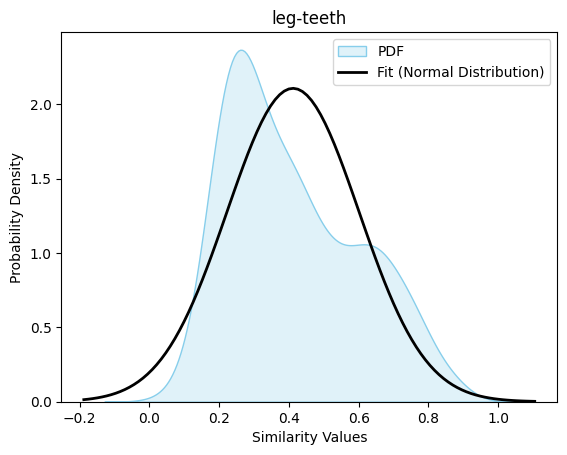

0.38822836
0.1842012


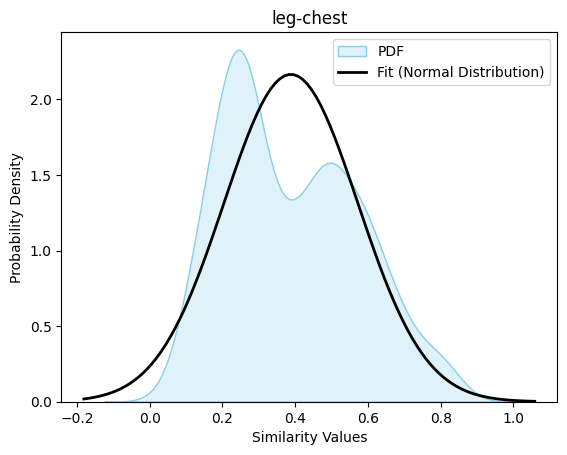

0.3859721
0.17751239


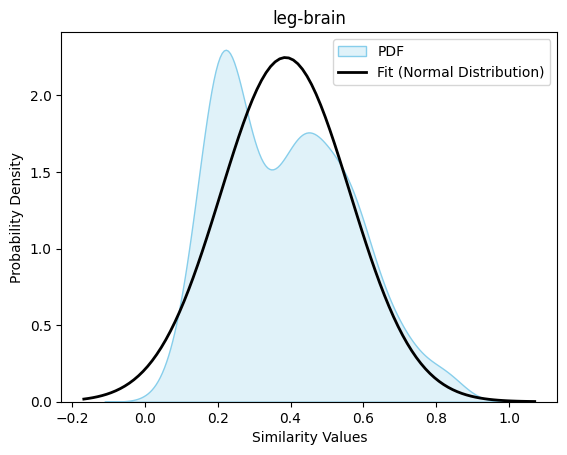

0.35539088
0.16653363


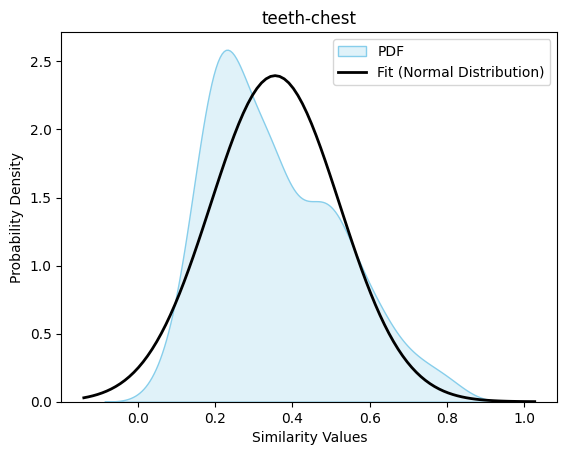

0.3802995
0.16919068


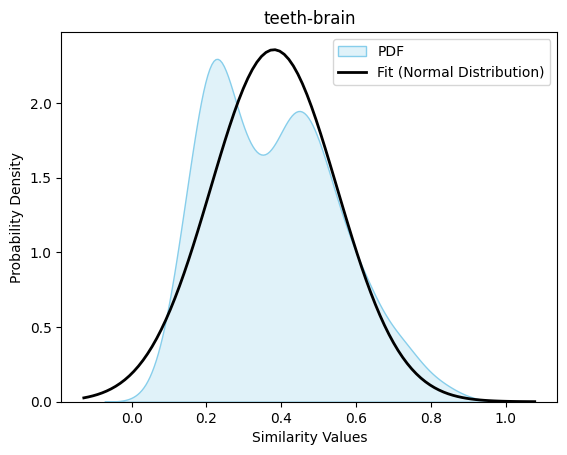

0.4119909
0.16945873


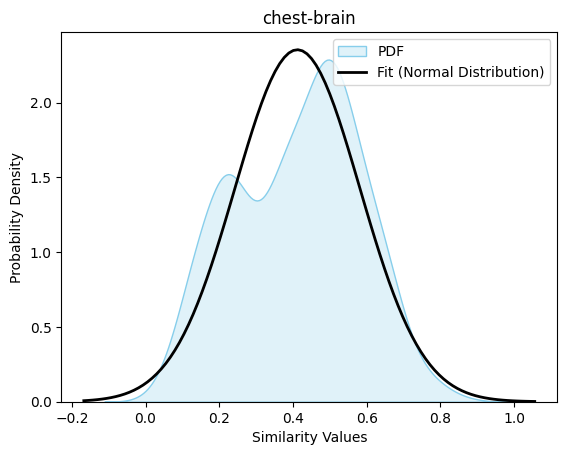

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# 将矩阵展平成一维数组

def plot_pdf_sim(similarity_matrix, title):
  similarity_values = similarity_matrix.flatten()

  # 统计数据
  mean_value = np.mean(similarity_values)
  print(mean_value)
  std_dev = np.std(similarity_values)
  print(std_dev)

  # # 画出数据分布图（PDF）
  # plt.hist(similarity_values, bins=30, density=True, alpha=0.5, color='b')

  # # 添加标签和标题
  # plt.xlabel('Similarity Values')
  # plt.ylabel('Probability Density')
  # plt.title('Similarity Matrix Distribution')

  # # 添加一个拟合的正态分布曲线
  # xmin, xmax = plt.xlim()
  # x = np.linspace(xmin, xmax, 100)
  # p = norm.pdf(x, mean_value, std_dev)
  # plt.plot(x, p, 'k', linewidth=2)
  # plt.title(title)
  # plt.grid()

  # # 显示图形
  # plt.show()
  # 使用seaborn画数据分布图（KDE）
  sns.kdeplot(similarity_values, fill=True, color='skyblue', label='PDF')

  # 添加标签和标题
  plt.xlabel('Similarity Values')
  plt.ylabel('Probability Density')
  plt.title('Similarity Matrix Distribution')

  # 添加一个拟合的正态分布曲线
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mean_value, std_dev)
  plt.plot(x, p, 'k', linewidth=2, label='Fit (Normal Distribution)')
  # 显示图例
  plt.legend()
  plt.title(title)
  # 显示图形
  plt.show()


# similarity_matrix = dic_pair_sim["leg-teeth"]
# plot_pdf_sim(similarity_matrix)
for i, j in dic_pair_sim.items():
  plot_pdf_sim(j, i)


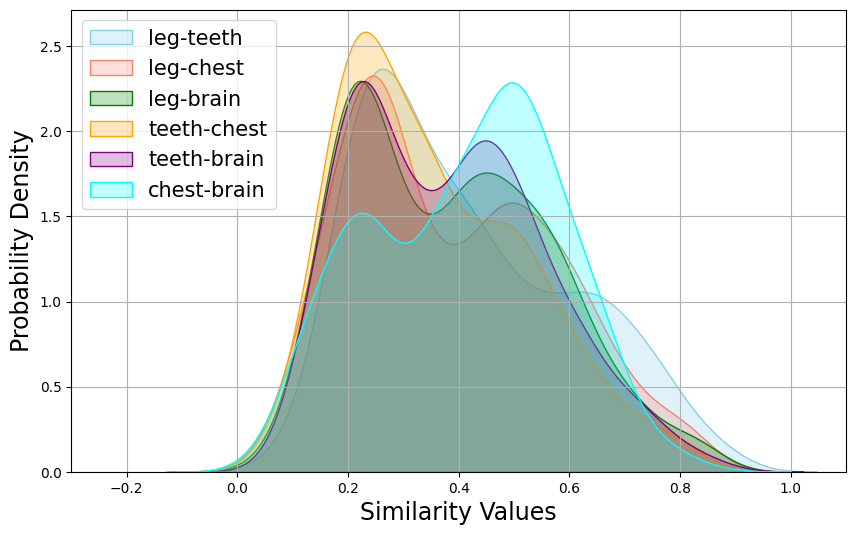

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'cyan', 'pink', 'yellow', 'brown', 'red']

line_styles = ['k--', 'k-.', 'k:']

# 创建一个图形
plt.figure(figsize=(10, 6))

# 循环处理每组相似度矩阵
i = -1
for k,j in dic_pair_sim.items():
    i +=1
    # 将矩阵展平成一维数组
    similarity_values = j.flatten()

    # 统计数据
    mean_value, std_dev = np.mean(similarity_values), np.std(similarity_values)

    # 使用seaborn画数据分布图（KDE）
    sns.kdeplot(similarity_values, fill=True, color=colors[i%9], label=k)

    # 添加拟合的正态分布曲线
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean_value, std_dev)
    # plt.plot(x, p, line_styles[i%2], linewidth=2, label=f'Fit {k} (Normal Distribution)')

# 添加标签和标题
plt.xlabel('Similarity Values', fontsize=17)
plt.ylabel('Probability Density', fontsize=17)
# plt.title('Cosine Similarity distribution among multiple diseases in different portions' ,fontsize=17)
plt.xlim(-0.3, 1.1)
# 显示图例
plt.legend(fontsize=15, loc='upper left')
plt.grid()

# 显示图形
plt.show()


-------------------
-------------------